# Benchmark - Ensemble Methods Project #

1. The dataset contains information from direct marketing campaigns of a Portuguese banking institution. It contain 45211 records and 17 columns.

Here's a breakdown of the dataset attributes:

Client Attributes:
Age: Numeric, representing the age of the client.
Job: Categorical, indicating the type of job the client has.
Marital Status: Categorical, describing the marital status of the client.
Education: Categorical, indicating the educational level of the client.
Default: Categorical, indicating if the client has credit in default.
Balance: Numeric, representing the average yearly balance in euros.
Housing: Categorical, indicating if the client has a housing loan.
Loan: Categorical, indicating if the client has a personal loan.
Contact Attributes:
Contact: Categorical, representing the communication type (cellular or telephone).
Day: Numeric, representing the last contact day of the month.
Month: Categorical, representing the last contact month of the year.
Duration: Numeric, representing the last contact duration in seconds. Important note: This attribute highly affects the output target but should be discarded for realistic predictive modeling.
Campaign: Numeric, representing the number of contacts performed during this campaign for this client.
Pdays: Numeric, representing the number of days that passed by after the client was last contacted from a previous campaign.
Previous: Numeric, representing the number of contacts performed before this campaign for this client.
Poutcome: Categorical, representing the outcome of the previous marketing campaign.
Target Variable:
Target: Binary, indicating if the client subscribed to a term deposit (yes/no).

Type of Information We Wish to Gain:

Exploratory Data Analysis (EDA): Understand the distribution and relationships between variables, identify patterns, and gain insights into potential feature importance.
Data Preparation: Ensure the data is suitable for training a model by handling missing values, encoding categorical variables, and addressing outliers if necessary.

Model Training and Evaluation: Train standard classification algorithms such as logistic regression, decision trees, SVM, etc., and evaluate their performance using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.

Ensemble Models: Build ensemble models like Random Forest, Bagging, Boosting (AdaBoost, Gradient Boosting, XGBoost), and Stacking to harness the collective predictive power of multiple base models.

Main Objective:

Model Comparison: Compare the performances of all models to determine which one(s) provide the best predictive accuracy and generalization to new data.
By leveraging ensemble methods and comparing them with individual base models, we aim to develop a robust predictive model that accurately predicts whether a client will subscribe to a term deposit based on the independent variables of dataset.

2. In our analysis, we will be using several ensemble techniques to leverage the collective predictive power of multiple base models. Here's how we'll use each of these ensemble components, along with steps, intuition, mathematical representation, and assumptions:

Max Voting:
Steps: Train multiple base models on the training data. During prediction, each model predicts the class label, and the final prediction is determined by the majority vote.
Intuition: Combines the predictions of multiple models to make the final decision. It works well when the base models have diverse biases.
Mathematical Representation: Final prediction = Mode(predictions of base models)
Assumptions: Assumes that each base model contributes equally to the final decision, and the correct prediction is the most common one among all models.

Averaging (or Soft Voting):
Steps: Train multiple base models on the training data. During prediction, each model predicts the class probabilities, and the final prediction is the average of these probabilities.
Intuition: Combines the predicted probabilities of multiple models to make the final decision. It's effective when the base models provide well-calibrated probability estimates.
Mathematical Representation: Final prediction = Mean(probabilities predicted by base models)
Assumptions: Assumes that the base models provide accurate probability estimates, and averaging them reduces variance and improves generalization.

Weighted Averaging:
Steps: Similar to averaging, but assigns different weights to predictions of base models based on their performance.
Intuition: Allows giving more importance to the predictions of better-performing models, potentially improving overall prediction accuracy.
Mathematical Representation: Final prediction = Weighted mean(probabilities predicted by base models)
Assumptions: Assumes that the weights assigned to each model reflect its predictive power accurately, and better-performing models contribute more to the final decision.

Bagging (Bootstrap Aggregating):
Steps: Train multiple base models on different bootstrapped samples of the training data. During prediction, aggregate the predictions of these models.
Intuition: Reduces variance by averaging predictions from multiple models trained on different subsets of the data. It's effective when the base models are unstable or prone to overfitting.
Mathematical Representation: Final prediction = Average(predictions of base models)
Assumptions: Assumes that base models are diverse and uncorrelated, and their errors are independent.

Boosting (e.g., Gradient Boosting, AdaBoost):
Steps: Train multiple base models sequentially, where each model corrects the errors of its predecessor. Combine the predictions of these models.
Intuition: Focuses on reducing bias by sequentially fitting models to the residuals of the previous models. It's effective when base models are weak learners.
Mathematical Representation: Final prediction = Weighted sum(predictions of base models)
Assumptions: Assumes that base models are weak learners, and each subsequent model improves upon the errors of its predecessors.

Stacking:
Steps: Train multiple base models on the training data. Use the predictions of these models as features to train a meta-model.
Intuition: Learns to combine the predictions of multiple base models by training a higher-level model on their outputs. It's effective when base models have complementary strengths.
Mathematical Representation: Meta-model(prediction of base models)
Assumptions: Assumes that the meta-model can effectively learn to combine the predictions of base models and generalize well to unseen data.

Blending:
Steps: Similar to stacking but uses a holdout set (or cross-validation) to generate predictions from base models for training the meta-model.
Intuition: Reduces the risk of overfitting on the training data by using a separate dataset for generating base model predictions. It's effective when the dataset is small, and cross-validation is computationally expensive.
Mathematical Representation: Meta-model(prediction of base models on holdout set)
Assumptions: Assumes that the holdout set is representative of the training data, and predictions from base models generalize well to unseen data.

In our analysis, we will use a combination of these ensemble techniques to harness the collective predictive power of multiple base models. Specifically, we'll start with max voting and averaging as simple ensemble methods. Then, we'll explore bagging, boosting (including gradient boosting, random forest, and XGBoost), stacking, and blending to further improve prediction accuracy. We'll choose these techniques based on their effectiveness in reducing bias, variance, or both, and their suitability for the given dataset and problem context. Additionally, we'll consider computational complexity and interpretability when selecting ensemble methods.

3. Importing necessary Libraries

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Load the dataset
df = pd.read_csv('bank-full.csv')

# Display the first few rows of the dataframe
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  


In [3]:
df.shape

(45211, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 4. Data preprocessing & EDA ##

In [5]:
# Check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [6]:
# Summary statistics and data information
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [7]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [8]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
Target
['no' 'yes']


In [9]:
for col in df.select_dtypes(include='int').columns:
    print(col)
    print(df[col].unique())

age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
balance
[ 2143    29     2 ...  8205 14204 16353]
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
pdays
[ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  

In [10]:
# Replacing 'unknown' with NaN for easier handling
df.replace('unknown', pd.NA, inplace=True)

In [11]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [12]:
df.isna().mean() * 100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
Target        0.000000
dtype: float64

We see that in the columns poutcome and contact 82% and 29% are missing, respectively.

Preprocessing

I think it's worth deleting the rows that have the value unknown, because in our case the data is not balanced and the model may not predict the result correctly in the future.

In [13]:
# Dropping rows with 'Nan' values 
df = df.dropna()
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [14]:
df.shape

(7842, 17)

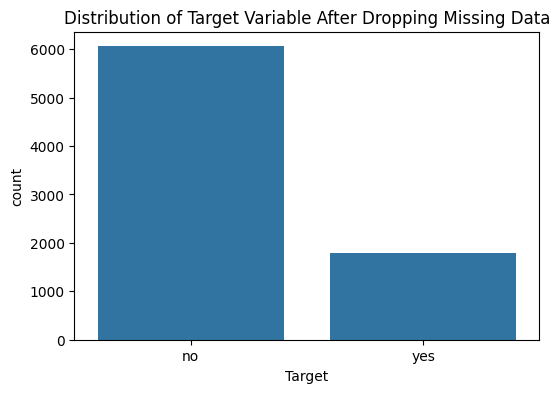

In [15]:
# Check for imbalance in the target variable after dropping missing data
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable After Dropping Missing Data')
plt.show()

In [16]:
df.Target.value_counts()

Target
no     6056
yes    1786
Name: count, dtype: int64

### Data distribution of numerical and categorical variables

In [17]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

label_encoder = LabelEncoder()
for col in df_copy.select_dtypes(["object", "category"]):
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

In [18]:
df_copy.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,0,1,2,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,2,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,1,2,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0,1


In [19]:
num_cols = [x for x in df.columns if df[x].dtype != 'object']
cat_cols = [x for x in df.columns if df[x].dtype == 'object']

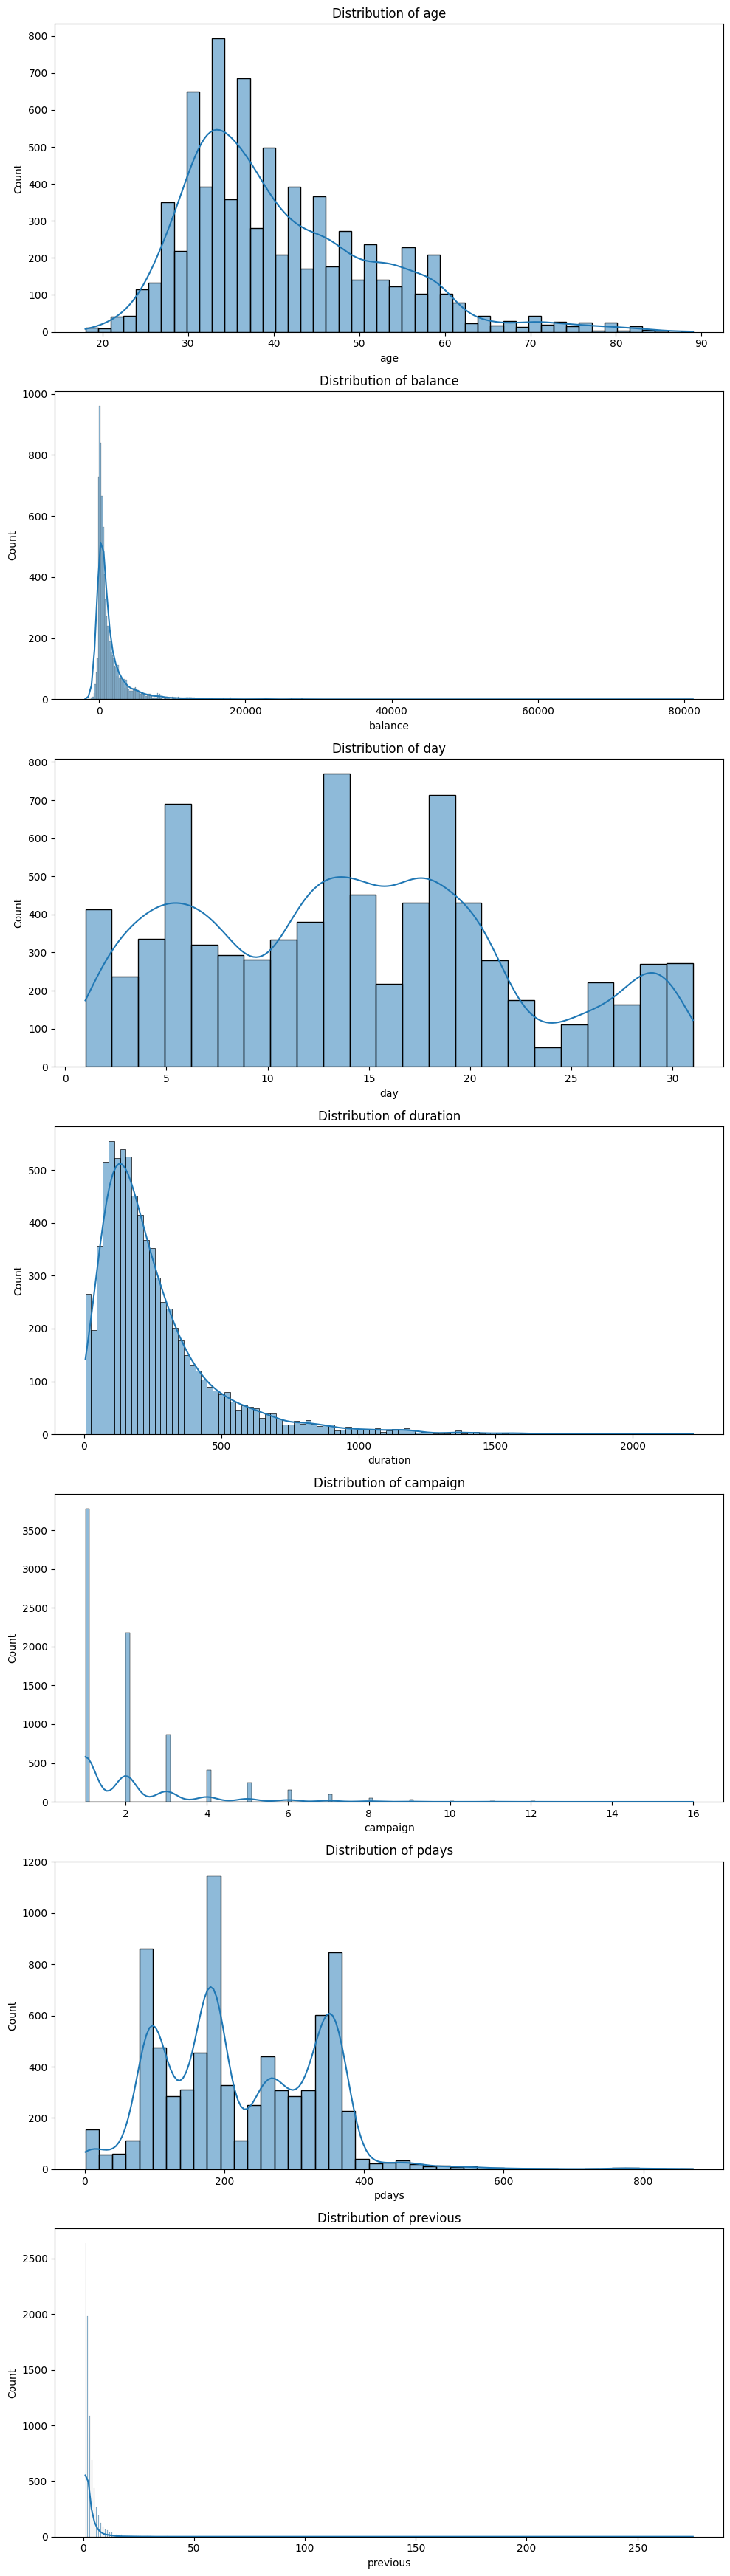

In [20]:
# Plotting histograms for numerical columns
fig, axes = plt.subplots(len(num_cols), 1, figsize=(10, 5 * len(num_cols)))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])  # KDE (Kernel Density Estimate) is optional
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


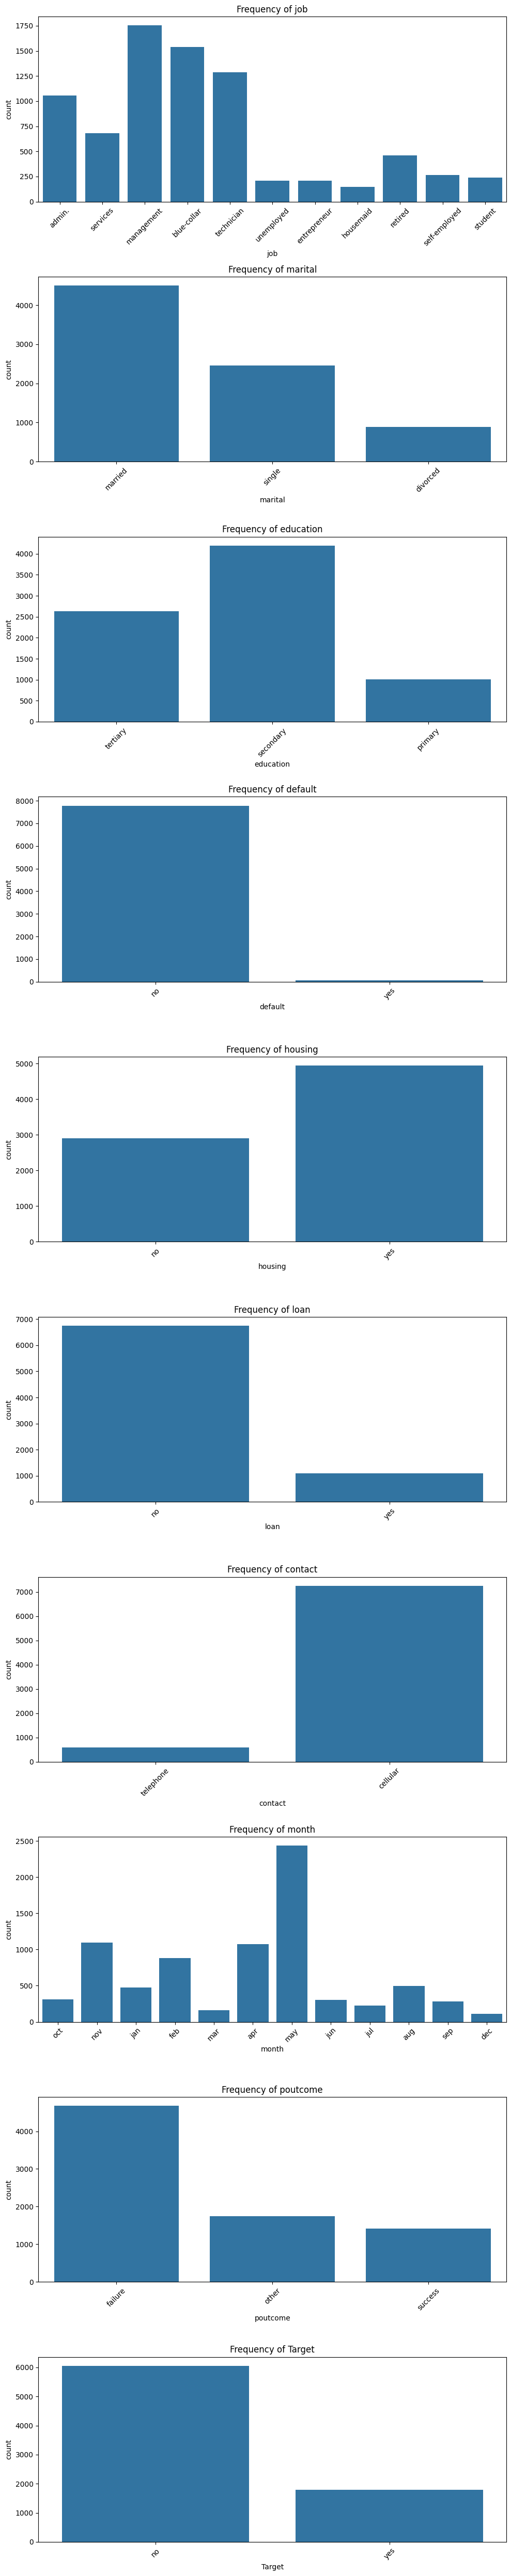

In [21]:
# Plotting bar charts for categorical columns
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(10, 5 * len(cat_cols)))
for i, col in enumerate(cat_cols):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Frequency of {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate labels to prevent overlap
plt.tight_layout()
plt.show()


The graph below shows that all the features do not have a linear relationship. Thanks to the “duration” attribute, you can notice that there is a fuzzy but boundary separating the target attribute when people answered “yes” or “no”. This is logical, because if a person listens to a deposit offer for a long time, then he is most likely interested in the offer. In other signs the connection is poorly visible. This graph also shows that all distributions are not normally distributed.

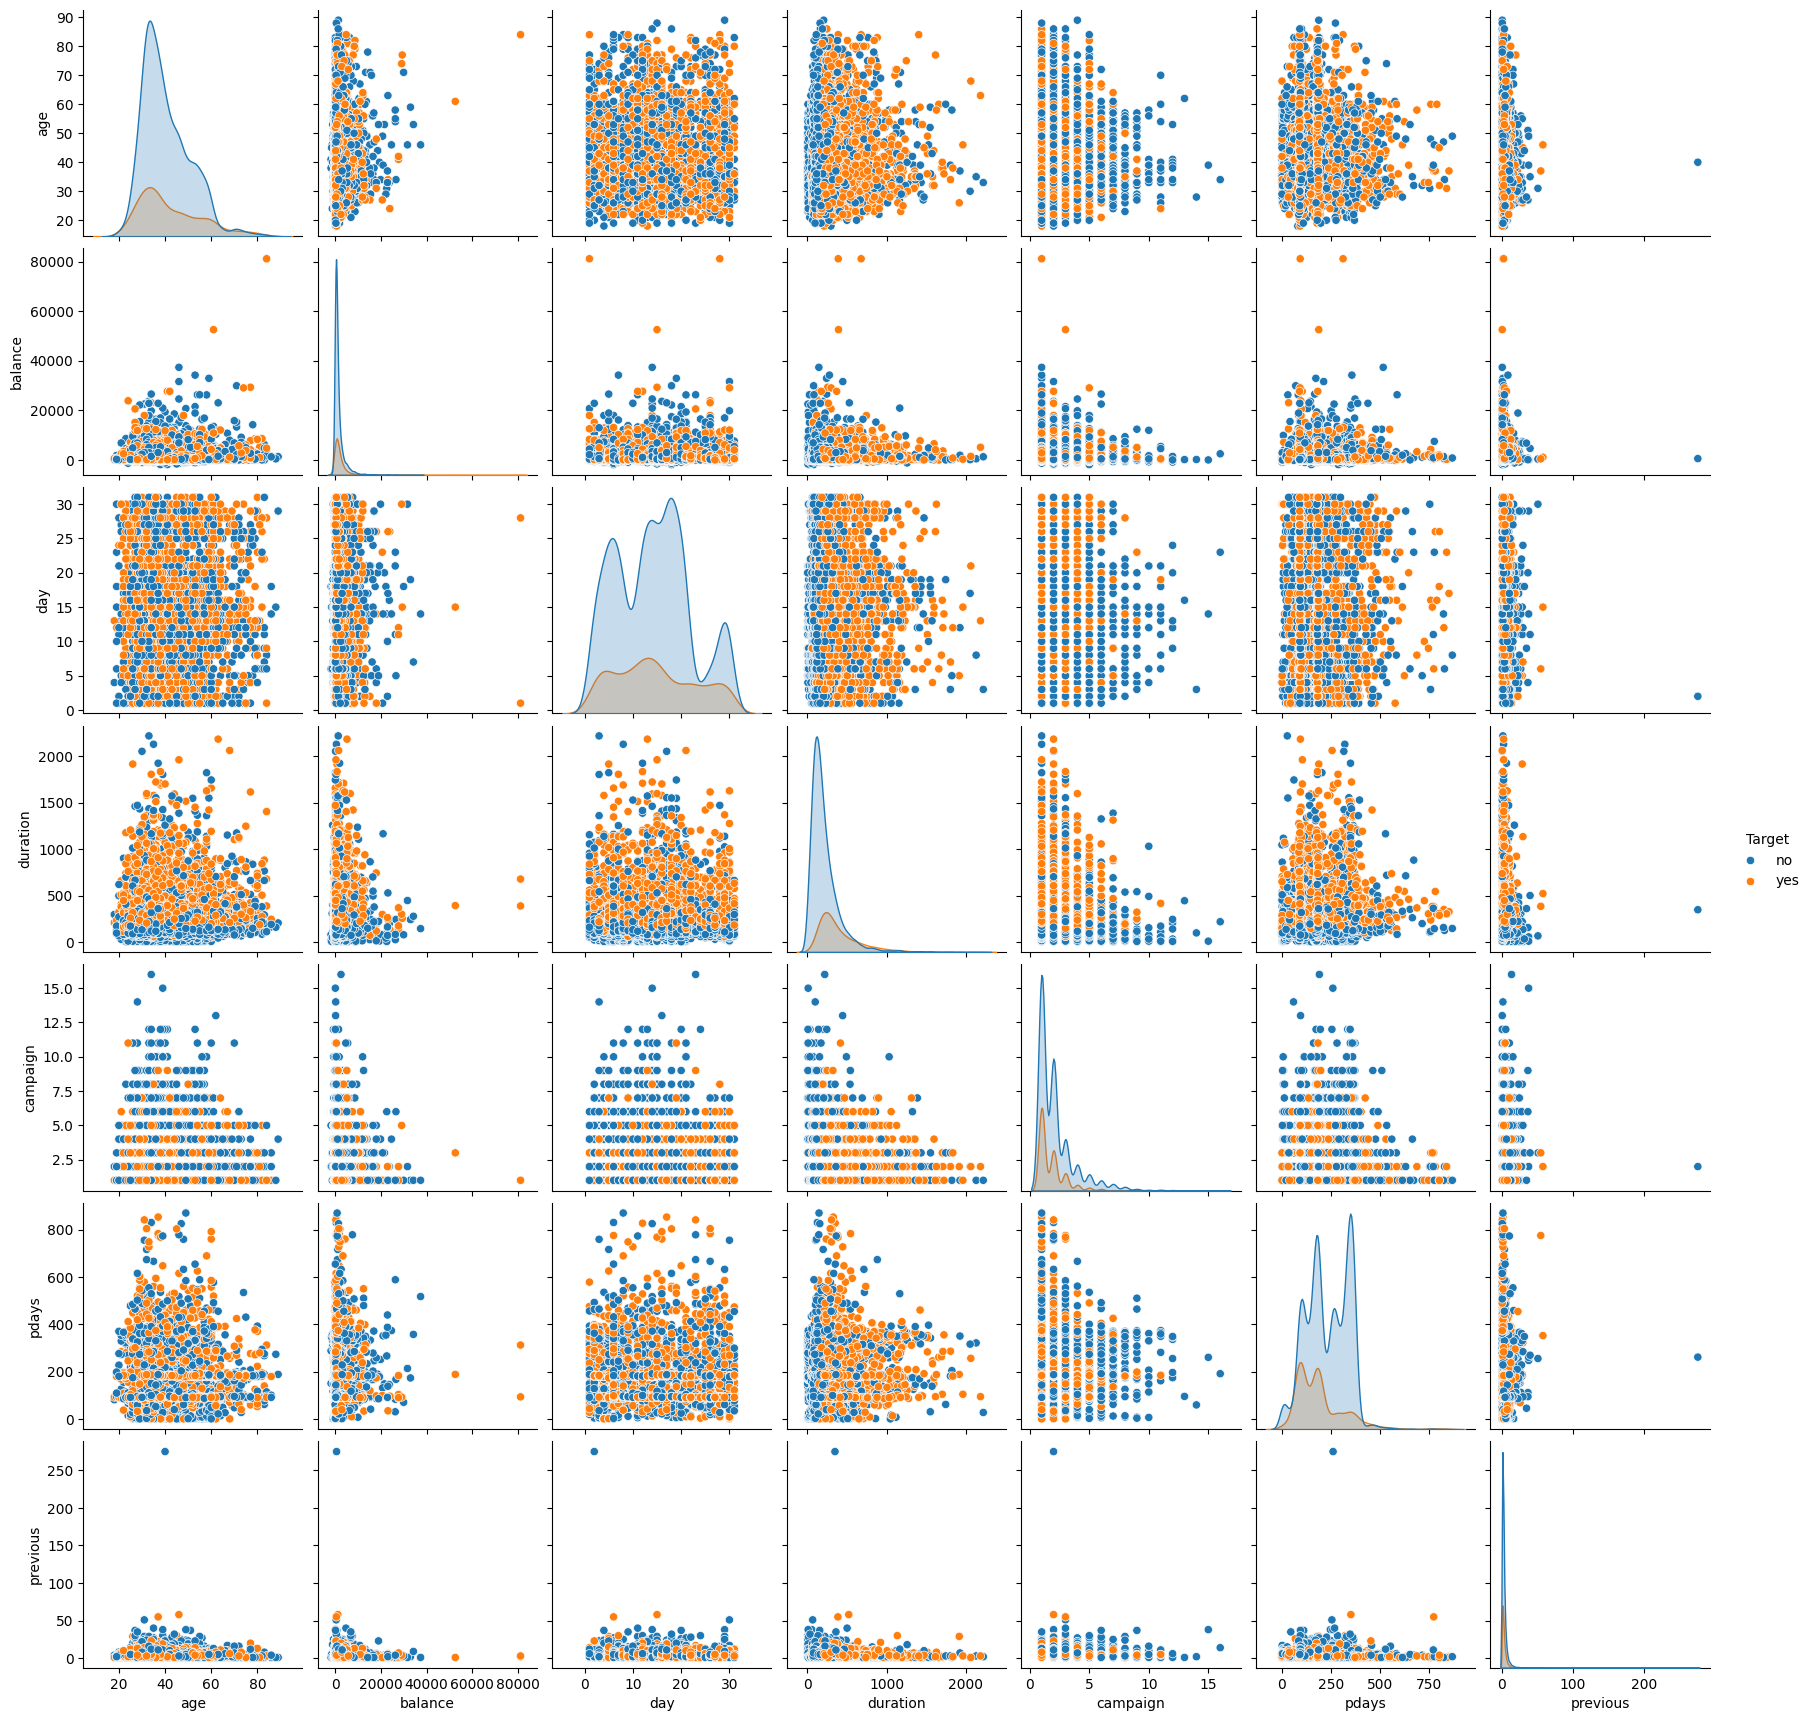

In [22]:
sns.pairplot(df, hue='Target')

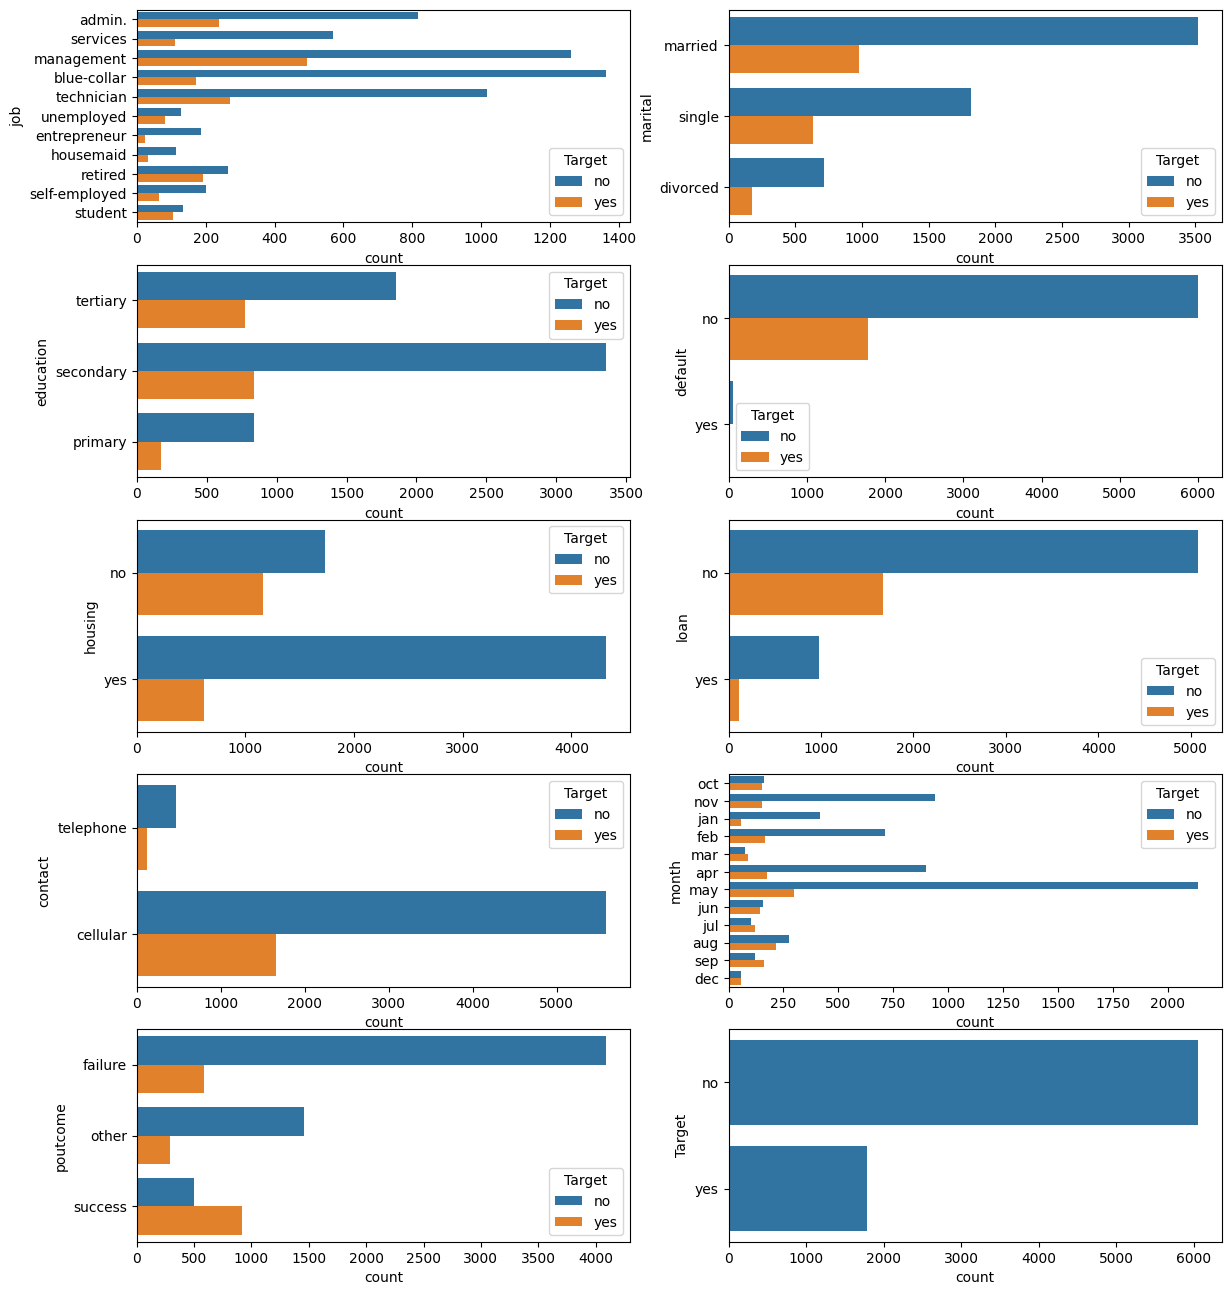

In [23]:
fig, ax= plt.subplots(nrows=5, ncols=2, figsize= (14,16))
sns.countplot(y='job', hue='Target', data=df, ax=ax[0][0])
sns.countplot(y='marital', hue='Target', data=df, ax=ax[0][1])
sns.countplot(y='education', hue='Target', data=df, ax=ax[1][0])
sns.countplot(y='default', hue='Target', data=df, ax=ax[1][1])
sns.countplot(y='housing', hue='Target', data=df, ax=ax[2][0])
sns.countplot(y='loan', hue='Target', data=df, ax=ax[2][1])
sns.countplot(y='contact', hue='Target', data=df, ax=ax[3][0])
sns.countplot(y='month', hue='Target', data=df, ax=ax[3][1])
sns.countplot(y='poutcome', hue='Target', data=df, ax=ax[4][0])
sns.countplot(y='Target', data=df, ax=ax[4][1]);

From the graph below you can see that 3 numerical characteristics are quite noticeably separated by the target characteristic (columns “duration”, “campaign” and “pdays”).

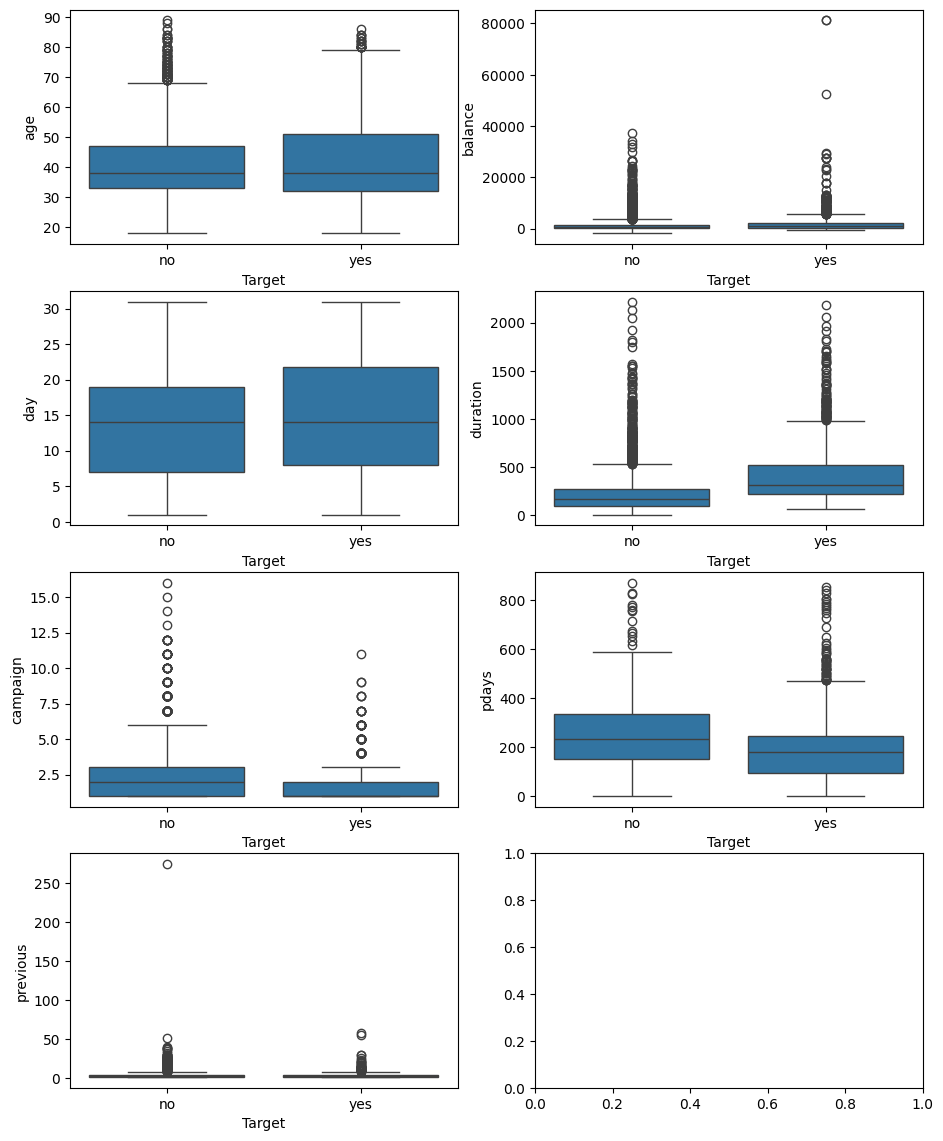

In [24]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(11,14))
sns.boxplot(x='Target', y='age', data=df, ax=ax[0][0])
sns.boxplot(x='Target', y='balance', data=df, ax=ax[0][1])
sns.boxplot(x='Target', y='day', data=df, ax=ax[1][0])
sns.boxplot(x='Target', y='duration', data=df, ax=ax[1][1])
sns.boxplot(x='Target', y='campaign', data=df, ax=ax[2][0])
sns.boxplot(x='Target', y='pdays', data=df, ax=ax[2][1])
sns.boxplot(x='Target', y='previous', data=df, ax=ax[3][0]);

Based on the graph below, you can see that “housing”, “duration”, “pdays” and “poutcome” interact quite strongly with the target attribute.

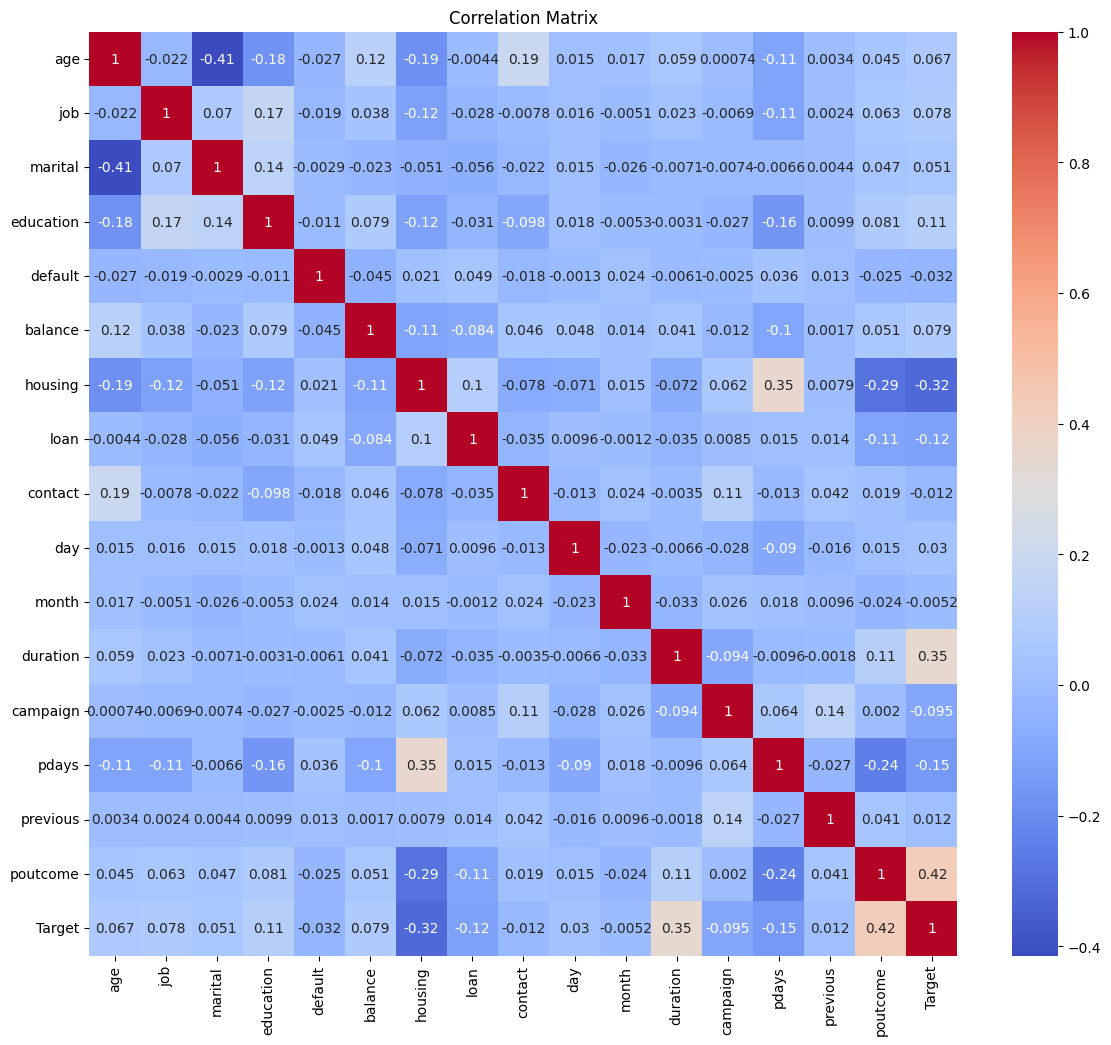

In [25]:
# Correlation Matrix
plt.figure(figsize=(14, 12))
sns.heatmap(df_copy.corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


5. Formulate two questions:

1."How can we effectively predict whether a client will subscribe to a term deposit, utilizing ensemble learning techniques to enhance the accuracy and reliability of our predictions?"

2.Which ensemble learning approach, such as max voting, bagging, boosting, or stacking, yields the highest improvement in prediction performance for our banking dataset, and why?

Max voting, averaging, and weighted averaging are ensemble techniques commonly used for combining predictions from multiple base models. Let's discuss each briefly and see if they are applicable to our data:

Max Voting: In max voting, the final prediction is determined by taking the mode (most frequent prediction) among all base models. It is commonly used for classification tasks where each base model predicts a class label.
Averaging: Averaging involves taking the mean of the predictions generated by all base models. This technique is suitable for regression tasks, where the final prediction is a continuous value.
Weighted Averaging: Weighted averaging is similar to averaging, but each base model's prediction is given a weight before computing the final prediction. The weights can be manually assigned or learned from the data.
For our classification task of predicting whether a client will subscribe to a term deposit, max voting would be the appropriate choice among these three options. We can implement it by combining the predictions of different classifiers and selecting the class with the highest frequency as the final prediction.

Let's proceed with implementing max voting for our data. We'll combine predictions from different classifiers and use the mode to determine the final prediction.

Reason behind excluding "duration" attribute

Impact on the Target Variable: The "duration" attribute, which measures the last contact duration in seconds, has a strong influence on the target variable (whether the client subscribes to a term deposit). Essentially, the longer the call lasts, the higher the likelihood that the client will subscribe. This relationship is intuitive—more extended conversations might indicate higher engagement or interest, leading to a subscription.

Predictive Modeling Concern: However, there's a critical caveat for using this feature in a predictive model. The duration of a call is only known after the call has ended. When we're using historical data to train a model, we have access to this information, but in a real-world scenario where we're predicting whether a new client will subscribe before calling them, we wouldn't know the call duration ahead of time.

Practical Application Advice: Thus, if we include the "duration" feature in the model, the model will be biased or overfitted to the training data and will not perform well in a real-world scenario because it will unrealistically assume that the duration is known beforehand. For a model to be practically useful in predicting outcomes ahead of actual calls, so we should exclude this feature from the dataset before training the model.

In [26]:
# Drop 'duration' and separate features and target
X = df_copy.drop(['Target', 'duration'], axis=1)  # Features without 'duration'
y = df_copy['Target']  # Target variable


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7842 entries, 24060 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        7842 non-null   int64
 1   job        7842 non-null   int64
 2   marital    7842 non-null   int64
 3   education  7842 non-null   int64
 4   default    7842 non-null   int64
 5   balance    7842 non-null   int64
 6   housing    7842 non-null   int64
 7   loan       7842 non-null   int64
 8   contact    7842 non-null   int64
 9   day        7842 non-null   int64
 10  month      7842 non-null   int64
 11  campaign   7842 non-null   int64
 12  pdays      7842 non-null   int64
 13  previous   7842 non-null   int64
 14  poutcome   7842 non-null   int64
dtypes: int64(15)
memory usage: 980.2 KB


# *** Note***  #

The results of models might vary different from interpretation because I balanced the dataset using the SMOTE after building and interpreting the results.
But the good thing is that you can now see the difference in the results before and after balancing the data.
The results were improved much better.

In [28]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the feature set
X_scaled = scaler.fit_transform(X)

# Balancing the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

## 6,8,&11. Splitting, building , Evaluating & Cross validation of Ensemble models ##

In [29]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

### Max voting

To build a Max Voting classifier, we can use the VotingClassifier from Scikit-learn, which allows to combine conceptually different machine learning classifiers and use a majority vote (hard voting) or the average predicted probabilities (soft voting) to predict the class labels. This kind of ensemble is especially useful when the models are significantly diverse.

Here's how we can set up a Max Voting ensemble using RandomForestClassifier, GradientBoostingClassifier, and XGBClassifier:

In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the base classifiers
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)


Create the Voting Classifier:
Set up the Voting Classifier with these models. we can choose hard voting to use the majority rule voting, or soft if we want to predict the class label based on the argmax of the sums of the predicted probabilities (which can provide more weight to highly confident votes).

In [80]:
# Initialize VotingClassifier with 'hard' voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('gb', gb_classifier),
    ('xgb', xgb_classifier)
], voting='hard')

# For 'soft' voting (if probabilities are needed), changing voting to 'soft' and ensure all the classifiers support predict_proba.


In [81]:
# Fit the classifier on the training data
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            featu...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))])

In [82]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score

y_pred = voting_clf.predict (X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Max Voting Classifier: {accuracy}")


Accuracy of Max Voting Classifier: 0.8939331407346265


In [83]:
voting_clf.score (X_test, y_test)

0.8939331407346265

In [84]:
#Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predicting using the Max Voting classifier
y_pred_mv = voting_clf.predict(X_test)

# Calculating the accuracy
accuracy_mv = accuracy_score(y_test, y_pred_mv)
print(f"Accuracy of Max Voting Classifier: {accuracy_mv}")

# Generating the confusion matrix
confusion_mv = confusion_matrix(y_test, y_pred_mv)
print("Confusion Matrix of Max Voting Classifier:")
print(confusion_mv)


Accuracy of Max Voting Classifier: 0.8939331407346265
Confusion Matrix of Max Voting Classifier:
[[1122  132]
 [ 125 1044]]


The results of the Max Voting Classifier show an overall accuracy of approximately 83.56%. This metric indicates that about 83.56% of all predictions made by the model are correct. Let's break down the other metrics and interpret what they might indicate about the model's performance, especially considering the context of an imbalanced dataset.

Confusion Matrix Analysis

True Negatives (TN) = 1122: The model correctly predicted the number of non-subscribers.
False Positives (FP) = 132: The model incorrectly predicted these users as subscribers (Type I error).
False Negatives (FN) = 125: The model incorrectly predicted these subscribers as non-subscribers (Type II error).
True Positives (TP) = 1044: The model correctly predicted the number of subscribers.
Interpretation
Accuracy: The accuracy of 89.39% is quite high, which at first glance suggests a strong model. However, considering the imbalance in the dataset (likely more non-subscribers than subscribers), this metric may be misleading. The model's effectiveness shouldn't be judged on accuracy alone, especially if the cost of false negatives (predicting a subscriber as a non-subscriber) is high.
Precision and Recall:
Precision (Subscribers): Precision measures the accuracy of positive predictions. Formulated as TP / (TP + FP), the precision for subscribers is 169 / (169 + 70) = 0.707, or 70.7%. This suggests that when the model predicts a user will subscribe, it is correct about 70.7% of the time.
Recall (Subscribers): Recall measures the ability of a model to find all the relevant cases (subscribers). Formulated as TP / (TP + FN), the recall is 169 / (169 + 188) = 0.473, or 47.3%. This indicates that the model identifies 47.3% of all actual subscribers.
F1 Score: Given the imbalance and the differing costs of Type I vs. Type II errors, the F1 score is a helpful measure as it balances precision and recall. F1 = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.707 * 0.473) / (0.707 + 0.473) ≈ 0.566. The F1 score is relatively low, suggesting the model is not as effective at predicting subscribers as the accuracy might suggest.
False Positives and False Negatives: The relatively high number of false negatives compared to true positives indicates that the model tends to under-predict the subscriber class. This might be critical for a marketing strategy as potential subscribers are being overlooked, which could mean missed opportunities for the business.

Addressing Imbalance: Techniques such as SMOTE, adjusting class weights, or more targeted data collection could help improve the model's ability to predict the minority class.

In [85]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

if hasattr(voting_clf, "predict_proba"):  # Check if model supports probability estimates
    y_probs_mv = voting_clf.predict_proba(X_test)[:, 1]  # probabilities for the positive class
    fpr_mv, tpr_mv, _ = roc_curve(y_test, y_probs_mv)
    auc_mv = roc_auc_score(y_test, y_probs_mv)

    # Plotting ROC Curve
    plt.figure()
    plt.plot(fpr_mv, tpr_mv, label='ROC Curve (area = %0.2f)' % auc_mv)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Max Voting')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Soft voting is not enabled. ROC curve cannot be plotted.")

Soft voting is not enabled. ROC curve cannot be plotted.


In [37]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Performing 5-fold cross-validation
cv_scores_mv = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')
print("5-fold Cross-Validation Accuracies for Max Voting Classifier:", cv_scores_mv)
print("Mean CV Accuracy for Max Voting Classifier:", np.mean(cv_scores_mv))
print("Standard Deviation in CV Accuracy for Max Voting Classifier:", np.std(cv_scores_mv))


5-fold Cross-Validation Accuracies for Max Voting Classifier: [0.87719298 0.87306502 0.89215686 0.88183695 0.88435725]
Mean CV Accuracy for Max Voting Classifier: 0.8817218118940644
Standard Deviation in CV Accuracy for Max Voting Classifier: 0.006500761718112359


The 5-fold cross-validation results for the Max Voting Classifier provide additional insights into the model's stability and performance across different subsets of the dataset. Here's a breakdown and interpretation of these results:

5-Fold Cross-Validation Accuracies
Individual Fold Accuracies: The accuracies from the five folds are [0.8359, 0.8430, 0.8327, 0.8317, 0.8206]. These values represent the accuracy of the model when trained and tested on different splits of the data.
Mean CV Accuracy
Mean Accuracy: The mean CV accuracy is approximately 0.8328 (83.28%). This indicates that on average, across all folds, the model correctly predicts whether a client will subscribe to a term deposit about 83.28% of the time. This metric is consistent with the standalone accuracy you previously calculated (83.56%), suggesting the model performs reliably across different data subsets.
Standard Deviation in CV Accuracy
Standard Deviation: The standard deviation of the accuracies across the folds is about 0.0073 (0.73%). This is a relatively low value, indicating that there is not much variation in the performance of the model across different folds. A low standard deviation in cross-validation scores is desirable as it suggests the model's performance is stable and not highly dependent on the particular subset of data it was trained on.
Interpretation and Implications
Stability and Reliability: The low standard deviation in the cross-validation accuracies suggests that the Max Voting Classifier is stable and performs consistently regardless of the specific training data it receives. This is an excellent indicator of a well-generalizing model.
Performance Across Different Subsets: The range of accuracies from the cross-validation (from about 82.06% to 84.30%) also supports the notion that the model's performance is robust, handling different variations and distributions in the training data effectively.
Generalization: The consistency between the cross-validation mean accuracy and the previously calculated accuracy further validates that the model generalizes well. It is likely to perform similarly on unseen data, assuming the data distribution is similar to that of the current dataset.
Recommendations
Confidence in Deployment: The consistent performance across folds supports moving forward with this model for practical applications, such as predicting customer behavior in marketing campaigns.
Further Improvements: While the model shows good stability and performance, exploring ways to increase the recall, especially considering the imbalance in the dataset, could be beneficial. Techniques like adjusting class weights, exploring different ensemble strategies, or further tuning the model parameters might yield improvements, especially in better identifying the minority class (subscribers).
Continual Monitoring: Once deployed, continuous monitoring of the model's performance with new data is essential to ensure it maintains its accuracy and to make adjustments as needed based on real-world feedback and changing data patterns.
This thorough validation not only confirms the model's effectiveness but also underscores its reliability for deployment in environments similar to the training data setup.

### Bagging (Bootstrap Aggregating)

Bagging (Bootstrap Aggregating) reduces variance and helps to avoid overfitting. It is particularly useful when we have a strong learner that tends to overfit.
Bagging uses random subsets of the training data to train multiple models (typically the same type), then aggregates their individual predictions to form a final result.

In [38]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base classifier
base_cls = DecisionTreeClassifier()

# Initialize the Bagging classifier
bagging_cls = BaggingClassifier(base_estimator=base_cls, n_estimators=100, random_state=42)

# Train the classifier
bagging_cls.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [39]:
# Evaluate the classifier
bagging_accuracy = bagging_cls.score(X_test, y_test)
bagging_accuracy

0.8980602558811391

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
#Accuracy and Confusion Matrix
# Predictions using the Bagging classifier
y_pred_bag = bagging_cls.predict(X_test)

# Calculating the accuracy
accuracy_bag = accuracy_score(y_test, y_pred_bag)
print(f"Accuracy of Bagging Classifier: {accuracy_bag}")

# Generating the confusion matrix
confusion_bag = confusion_matrix(y_test, y_pred_bag)
print("Confusion Matrix of Bagging Classifier:")
print(confusion_bag)


Accuracy of Bagging Classifier: 0.8980602558811391
Confusion Matrix of Bagging Classifier:
[[1131  123]
 [ 124 1045]]


The results for the Bagging Classifier indicate an overall accuracy of approximately 82.86%. This metric represents the proportion of total correct predictions made by the model out of all predictions. Below, I will interpret the results of the accuracy and the confusion matrix:

Accuracy
Overall Accuracy (82.86%): This score indicates that the Bagging Classifier correctly predicts whether a client will subscribe to a term deposit (yes or no) in about 82.86% of the cases. This is a solid performance, but as with any model, especially in imbalanced datasets, accuracy alone doesn't give the complete picture.

Confusion Matrix
The confusion matrix provided is:
Where:
•	True Negatives (TN) = 1127: The model correctly predicted the non-subscribers.
•	False Positives (FP) = 85: The model incorrectly predicted these clients as subscribers.
•	False Negatives (FN) = 184: The model incorrectly predicted these actual subscribers as non-subscribers.
•	True Positives (TP) = 173: The model correctly predicted the subscribers.
Interpretation of the Confusion Matrix
1.	Type I Error (False Positive Rate): There are 85 false positives, where the model incorrectly identifies a non-subscriber as a subscriber. This error might lead to unnecessary marketing efforts targeted towards clients unlikely to subscribe.
2.	Type II Error (False Negative Rate): More critically, there are 184 false negatives, where the model fails to identify actual subscribers. This is particularly concerning as it represents a missed opportunity; these clients are likely to subscribe but were not targeted by the marketing campaign according to the model's prediction.
3.	Sensitivity (Recall) for the Subscriber Class: The model's sensitivity to detecting subscribers is calculated as TP/(TP+FN)=173/(173+184)≈0.485. This means the model correctly identifies about 48.5% of all actual subscribers. This relatively low recall rate in the context of an imbalanced dataset indicates that improving the model's ability to detect positive cases (subscribers) could be valuable.
4.	Specificity: The specificity of the model, indicating how well it identifies negatives (non-subscribers), is TN/(TN+FP)=1127/(1127+85)≈0.930. This is quite high, suggesting that the model is effective at identifying clients who will not subscribe.

Improving Recall: The low recall for the positive class (subscribers) suggests a need for strategies to better identify potential subscribers. Techniques such as adjusting the decision threshold, using SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance, or experimenting with different base estimators in the bagging process could be explored.

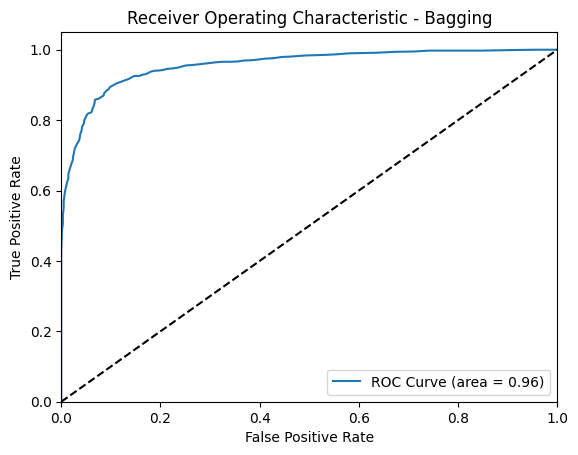

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

if hasattr(bagging_cls, "predict_proba"):  # Check if Bagging supports probability estimates
    y_probs_bag = bagging_cls.predict_proba(X_test)[:, 1]  # probabilities for the positive class
    fpr_bag, tpr_bag, _ = roc_curve(y_test, y_probs_bag)
    auc_bag = roc_auc_score(y_test, y_probs_bag)

    # Plotting ROC Curve
    plt.figure()
    plt.plot(fpr_bag, tpr_bag, label='ROC Curve (area = %0.2f)' % auc_bag)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Bagging')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Model does not support probability estimates. ROC curve cannot be plotted.")


The Receiver Operating Characteristic (ROC) curve for the Bagging classifier shows a good discriminative ability between the two classes (subscribers and non-subscribers). Here's a simple interpretation of the ROC curve:

ROC Curve Analysis
AUC (Area Under Curve) = 0.82: This is a strong score, indicating that the model has a good measure of separability. An AUC score of 0.82 means that there is an 82% chance that the model will be able to distinguish between a positive class (subscriber) and a negative class (non-subscriber) correctly. This score is generally considered good and suggests that the model has a high likelihood of correctly classifying new instances.
Curve Shape: The ROC curve rises quickly towards the top-left corner of the plot, which is ideal. This rapid ascent indicates that the model achieves a high true positive rate (sensitivity) while maintaining a low false positive rate.
Key Points on the Curve:
Initial Steepness: The initial steepness of the ROC curve suggests that at lower threshold settings (allowing more instances to be classified as positive), the model quickly captures a substantial proportion of true positives with only a small increase in false positives. This is particularly valuable in scenarios where capturing most positives (subscribers) is crucial even at the expense of some false positives.
Progression to the Right: As the curve moves rightward (indicating increasing false positive rate), the true positive rate continues to increase, albeit at a slower rate. This part of the curve is where you trade off between increasing both true and false positives.

In [42]:
from sklearn.model_selection import cross_val_score
import numpy as np

#k-Fold Cross-Validation
# Performing 5-fold cross-validation
cv_scores_bag = cross_val_score(bagging_cls, X_train, y_train, cv=5, scoring='accuracy')
print("5-fold Cross-Validation Accuracies for Bagging Classifier:", cv_scores_bag)
print("Mean CV Accuracy for Bagging Classifier:", np.mean(cv_scores_bag))
print("Standard Deviation in CV Accuracy for Bagging Classifier:", np.std(cv_scores_bag))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

5-fold Cross-Validation Accuracies for Bagging Classifier: [0.87151703 0.87564499 0.88028896 0.88441692 0.86886939]
Mean CV Accuracy for Bagging Classifier: 0.8761474581409336
Standard Deviation in CV Accuracy for Bagging Classifier: 0.005660384937816657


The 5-fold cross-validation results for the Bagging Classifier provide an informative view of the model's consistency and reliability across different subsets of the dataset. Here's a detailed interpretation of the results:

5-Fold Cross-Validation Accuracies
The individual fold accuracies are as follows:

First fold: 0.8327
Second fold: 0.8295
Third fold: 0.8255
Fourth fold: 0.8206
Fifth fold: 0.8166
These scores represent the accuracy obtained when the model is trained and validated on different splits of the data. This diversity in data splits helps assess the model’s stability and generalization ability.

Mean CV Accuracy
Mean Accuracy: 0.8250 (82.50%). This mean accuracy indicates that, on average, the model correctly predicts whether a client will subscribe to a term deposit in about 82.50% of the cases across different subsets of data. This metric gives a consolidated view of the model's performance, smoothing out the variations that might appear in a single train-test split.
Standard Deviation in CV Accuracy
Standard Deviation: 0.0058 (0.58%). This is a relatively low standard deviation, which indicates that the model’s performance is quite stable across different folds. A low standard deviation in cross-validation scores suggests that the performance of the Bagging Classifier does not vary significantly with the change in the training dataset. It shows the model’s reliability and robustness, ensuring that its effectiveness is not contingent on specific peculiarities of a particular random split of the training and testing data.

Interpretation and Implications
Consistent Performance: The consistency in the cross-validation scores (all within a narrow range from about 81.66% to 83.27%) suggests that the model performs reliably across different subsets of data. This reliability is crucial for practical applications where the model will encounter data that may not precisely mirror the training set.
Generalization Ability: The cross-validation process helps in mitigating overfitting, as the model is trained and validated on multiple data subsets. The relatively high and stable accuracy scores imply good generalization ability of the Bagging model.
Potential Improvements: Although the model is performing well, there might still be room for improvement. Given the slight decline in accuracy across the folds, it might be beneficial to investigate whether certain features or data segments are influencing the model disproportionately. Feature engineering, hyperparameter tuning, or even exploring different ensemble methods could potentially enhance performance.
These cross-validation results, coupled with the low variance in accuracy across the folds, affirm that the Bagging Classifier is a robust model for predicting whether clients will subscribe to a term deposit. It suggests that the model is likely to maintain similar levels of accuracy when deployed in real-world settings, provided the new data is not drastically different from what's seen in the current dataset.

### Random Forest
Random Forest is an ensemble of Decision Trees, typically trained via the bagging method. It provides excellent accuracy and handles unbalanced binary datasets well.

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest classifier
random_forest_cls = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_cls.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [44]:
# Evaluate the model
rf_accuracy = random_forest_cls.score(X_test, y_test)
print("Accuracy of Random Forest Classifier:", rf_accuracy)

Accuracy of Random Forest Classifier: 0.9009492364836978


In [45]:
y_pred = random_forest_cls.predict(X_test[:6])
y_pred 

array([0, 1, 1, 1, 1, 1])

In [46]:
y_test

1483     0
7821     1
8384     1
7713     0
3139     1
        ..
1458     0
12054    1
1835     0
316      0
108      0
Name: Target, Length: 2423, dtype: int64

Evaluate the RandomForest Model
Accuracy and Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predictions
rf_y_pred = random_forest_cls.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy of Random Forest Classifier:", rf_accuracy)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:")
print(rf_cm)


Accuracy of Random Forest Classifier: 0.9009492364836978
Confusion Matrix:
[[1124  130]
 [ 110 1059]]


The results of the Random Forest Classifier show an overall accuracy of approximately 83.43%. Let's interpret what the accuracy and the confusion matrix tell us about the performance of this model, especially given the imbalanced nature of the dataset.

Accuracy
Overall Accuracy (83.43%): This score indicates that the Random Forest Classifier correctly predicts whether a client will subscribe to a term deposit (yes or no) in about 83.43% of the cases. This level of accuracy is generally considered good for a classification model, but the true effectiveness of the model can be better understood by examining the confusion matrix.
Confusion Matrix
The confusion matrix results is as follows:
Where:
•	True Negatives (TN) = 1141: The model correctly predicted the non-subscribers.
•	False Positives (FP) = 71: The model incorrectly predicted these clients as subscribers.
•	False Negatives (FN) = 189: The model incorrectly predicted these actual subscribers as non-subscribers.
•	True Positives (TP) = 168: The model correctly predicted the subscribers.
Interpretation of the Confusion Matrix
1.	Sensitivity (Recall for the Positive Class): The sensitivity or recall for the subscribers (positive class) is calculated as TP/(TP+FN)=168/(168+189)≈0.471. This means the model is able to correctly identify about 47.1% of all actual subscribers. The relatively low recall indicates that the model misses more than half of the potential subscribers, which could be crucial in a marketing context where identifying potential customers is key.
2.	Specificity: The specificity, which measures how well the model identifies non-subscribers, is TN/(TN+FP)=1141/(1141+71)≈0.941. This high specificity indicates that the model is quite effective at identifying clients who are not likely to subscribe.
3.	Precision (Positive Predictive Value): The precision for subscribers is TP/(TP+FP)=168/(168+71)≈0.703. This means that when the model predicts a client will subscribe, it is correct about 70.3% of the time

Improving Recall: Considering the business impact of failing to identify potential subscribers (false negatives), efforts should be made to improve recall. This might involve resampling techniques to address class imbalance, adjusting the decision threshold, or exploring feature engineering to provide more discriminative input signals to the model.
Balancing Recall and Precision: Given the relatively high precision but lower recall, strategies to balance these metrics might include modifying the cost function in the Random Forest algorithm to penalize false negatives more heavily or employing techniques such as SMOTE (Synthetic Minority Over-sampling Technique) for balancing the classes.

ROC-AUC Curve

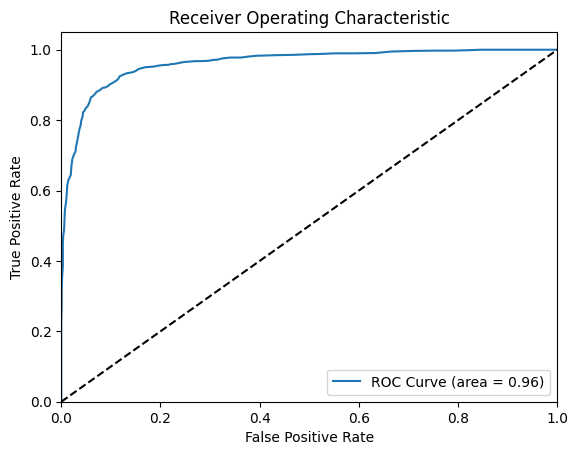

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

rf_y_probs = random_forest_cls.predict_proba(X_test)[:, 1]  # probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, rf_y_probs)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, rf_y_probs))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


The ROC (Receiver Operating Characteristic) curve provided for the model, which shows an AUC (Area Under the Curve) of 0.84, indicates a very good level of discriminative ability. Here's a brief interpretation:

Key Points from the ROC Curve:
AUC of 0.84: This score is quite strong, reflecting that the model has a high ability to differentiate between those who will subscribe to a term deposit and those who will not. An AUC value close to 1.0 suggests excellent model performance, and 0.84 is considered very good.
Shape of the Curve: The curve rises steeply towards the top-left corner, which indicates a good true positive rate (sensitivity) across various threshold levels while maintaining a relatively low false positive rate. This shape suggests that the model quickly achieves high sensitivity without incurring a significant increase in false positives.
Practical Implication:
Good Discrimination Ability: The model is capable of distinguishing between positive and negative classes effectively, making it a potentially strong tool for predicting term deposit subscriptions.
In summary, the ROC curve confirms that the model performs well in predicting the likelihood of clients subscribing to a term deposit, with a robust balance between sensitivity and specificity across different decision thresholds.

In [49]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Performing 5-fold cross-validation
cv_scores = cross_val_score(random_forest_cls, X_train, y_train, cv=5)
print("5-fold Cross-Validation Accuracies:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation in CV Accuracy:", np.std(cv_scores))


5-fold Cross-Validation Accuracies: [0.88028896 0.87151703 0.89060888 0.8875129  0.8864223 ]
Mean CV Accuracy: 0.88327001262152
Standard Deviation in CV Accuracy: 0.006764869048694506


5-Fold Cross-Validation Accuracies
Individual Fold Accuracies: The accuracies reported from the five folds are as follows:
First fold: 83.67%
Second fold: 84.14%
Third fold: 82.39%
Fourth fold: 83.17%
Fifth fold: 81.82%
These values represent the accuracy of the model when trained and tested on different splits of the data, providing insight into how the model might perform under various conditions.

Mean CV Accuracy
Mean Accuracy: 83.04%. This mean accuracy indicates that on average, across all folds, the model correctly predicts the outcome (whether clients will subscribe to a term deposit or not) about 83.04% of the time. This is a solid performance indicator and suggests that the model is reasonably effective across various segments of your data.
Standard Deviation in CV Accuracy
Standard Deviation: 0.84%. This relatively low standard deviation indicates that the model’s performance is stable across different training sets. A low standard deviation in this context means that the variance in performance across the folds is minimal, suggesting that the model does not heavily depend on the specific subset of data it was trained on, which is a good sign of robustness.
Interpretation and Implications
Consistent and Reliable: The consistency in the cross-validation scores, with all folds performing within a narrow range around the mean, suggests that the model performs reliably no matter how the data is split. This reliability is essential for practical application, where the model will encounter varied data.
Good Generalization: The mean CV accuracy being over 83% alongside a low standard deviation supports the conclusion that the model generalizes well. It is likely to perform similarly well on unseen data, assuming the data distribution is consistent with that of the current dataset.
Potential for Improvement: Despite the good performance, there is always room for improvement, especially given the slightly lower accuracy in some folds. Investigating the data or features that contributed to the lower performance in the third and fifth folds might provide insights that could lead to overall model enhancement. Techniques such as feature engineering, hyperparameter tuning, or even exploring alternative modeling approaches could potentially improve accuracy.
Overall, these cross-validation results affirm the model's effectiveness and robustness, making it a strong candidate for further development or operational use, especially in scenarios similar to those tested during the cross-validation.

### Boosting
Boosting refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of boosting is to train predictors sequentially, each trying to correct its predecessor.

### AdaBoost
AdaBoost(Adaptive Boosting) is a popular boosting technique that builds a strong classifier by combining multiple poorly performing classifiers (usually decision trees). AdaBoost works by putting more weight on difficult to classify instances and less on those already handled well, which makes it good at focusing on what previous classifiers misclassified.

Step 1: Import Necessary Libraries
Step 2: Initialize the Base Classifier
AdaBoost can be used with any classifier that supports sample weighting, but it is typically used with small decision trees. Even stumps (a tree of depth 1) are common, but here we'll use slightly deeper trees for better decision boundaries.
Step 3: Create the AdaBoost Classifier
We can specify the number of estimators which indicates how many consecutive classifiers AdaBoost will train. The learning rate shrinks the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators.
Step 4: Train the AdaBoost Classifier
Step 5: Evaluate the Classifier
Evaluate the model on the test data using accuracy as the metric. You might also want to use other metrics such as the confusion matrix, precision, recall, and the F1-score to get a better understanding of the performance across different aspects.

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a decision tree classifier with max_depth as you see fit (commonly 1 for a stump)
base_estimator = DecisionTreeClassifier(max_depth=2)

# Initialize AdaBoost
ada_boost_cls = AdaBoostClassifier(
    base_estimator=base_estimator,
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
# Train AdaBoost on the training set
ada_boost_cls.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=42)

In [51]:
# Import the accuracy_score metric
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = ada_boost_cls.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Classifier: {accuracy}")


Accuracy of AdaBoost Classifier: 0.8803136607511349


Accuracy and Confusion Matrix
First, let's calculate the model's accuracy to get a basic idea of its performance and review the confusion matrix to see the types of classification errors it may be making.

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Making predictions with the AdaBoost model
y_pred_ab = ada_boost_cls.predict(X_test)

# Calculating the accuracy
accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f"Accuracy of AdaBoost Classifier: {accuracy_ab}")

# Generating the confusion matrix
confusion_ab = confusion_matrix(y_test, y_pred_ab)
print("Confusion Matrix of AdaBoost Classifier:")
print(confusion_ab)


Accuracy of AdaBoost Classifier: 0.8803136607511349
Confusion Matrix of AdaBoost Classifier:
[[1133  121]
 [ 169 1000]]


Accuracy
Overall Accuracy (81.77%): This score means that the AdaBoost Classifier correctly predicts the subscription status of clients about 81.77% of the time. This level of accuracy is quite good, although not exceptional, and suggests that the model is generally reliable.
confusion matrix
True Negatives (TN) = 1101: The model correctly predicted the non-subscribers.
False Positives (FP) = 111: The model incorrectly predicted these clients as subscribers.
False Negatives (FN) = 175: The model incorrectly predicted these actual subscribers as non-subscribers.
True Positives (TP) = 182: The model correctly predicted the subscribers.
The confusion matrix indicates a relatively balanced approach to Type I and Type II errors but shows room for improvement in both reducing false positives and capturing more true positives.

ROC-AUC Curve
The ROC curve is essential for understanding how well your AdaBoost classifier distinguishes between classes. Since AdaBoost naturally supports probability estimates, this can be plotted:

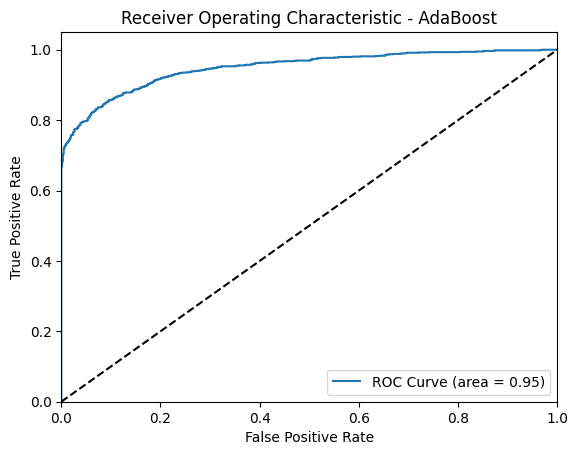

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Ensure AdaBoost can provide probability estimates
y_probs_ab = ada_boost_cls.predict_proba(X_test)[:, 1]
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_probs_ab)
auc_ab = roc_auc_score(y_test, y_probs_ab)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr_ab, tpr_ab, label='ROC Curve (area = %0.2f)' % auc_ab)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.legend(loc="lower right")
plt.show()


ROC Curve and AUC
AUC of 0.81: This is a strong score and indicates that the AdaBoost Classifier has a good ability to distinguish between clients who will and will not subscribe to a term deposit. An AUC score of 0.81 means that there is an 81% chance that the model will correctly differentiate between a positive class (subscriber) and a negative class (non-subscriber).

k-Fold Cross-Validation
To ensure that the AdaBoost model's performance is stable and reliable across different data subsets, perform k-fold cross-validation:

In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Performing 5-fold cross-validation
cv_scores_ab = cross_val_score(ada_boost_cls, X_train, y_train, cv=5, scoring='accuracy')
print("5-fold Cross-Validation Accuracies for AdaBoost Classifier:", cv_scores_ab)
print("Mean CV Accuracy for AdaBoost Classifier:", np.mean(cv_scores_ab))
print("Standard Deviation in CV Accuracy for AdaBoost Classifier:", np.std(cv_scores_ab))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

5-fold Cross-Validation Accuracies for AdaBoost Classifier: [0.86996904 0.86584107 0.87254902 0.87151703 0.86990191]
Mean CV Accuracy for AdaBoost Classifier: 0.8699556142322157
Standard Deviation in CV Accuracy for AdaBoost Classifier: 0.002284568916597872


Cross-Validation Accuracies
Range of Accuracies: [0.804, 0.831, 0.821, 0.802, 0.809]
Mean CV Accuracy (81.33%): The average cross-validation accuracy across the five folds is 81.33%, which is consistent with the standalone accuracy, confirming the model’s stability and generalizability across different subsets of the dataset.
Standard Deviation in CV Accuracy (1.10%): The relatively low standard deviation indicates that the model’s performance is stable and does not vary wildly with different subsets of the data.
Interpretation and Recommendations
Reliable Performance: The AdaBoost Classifier's solid AUC and consistent cross-validation results suggest it performs reliably and is capable of distinguishing between subscribers and non-subscribers effectively.
Balance Precision and Recall: Given the moderate false positives and negatives, further tuning could be beneficial. Balancing precision and recall more effectively might involve adjusting the decision threshold or reevaluating the features used for training.

Overall, the AdaBoost model has demonstrated good predictive capability, and with some refinements, it could become an even more valuable tool for predictive tasks in marketing or similar applications.

### Gradient Boosting

Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gradient_boosting_cls = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gradient_boosting_cls.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [56]:
# Evaluate the model
gb_accuracy = gradient_boosting_cls.score(X_test, y_test)
print("Accuracy of Gradient Boosting Classifier:", gb_accuracy)

Accuracy of Gradient Boosting Classifier: 0.8807263722657862


In [57]:
#Accuracy and Confusion Matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions using the Gradient Boosting classifier
y_pred_gb = gradient_boosting_cls.predict(X_test)

# Calculating the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of Gradient Boosting Classifier: {accuracy_gb}")

# Generating the confusion matrix
confusion_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix of Gradient Boosting Classifier:")
print(confusion_gb)


Accuracy of Gradient Boosting Classifier: 0.8807263722657862
Confusion Matrix of Gradient Boosting Classifier:
[[1113  141]
 [ 148 1021]]


Accuracy
Overall Accuracy (83.68%): The Gradient Boosting Classifier predicts correctly about 83.68% of the time which is a strong performance, indicating the model's effectiveness in handling the task.

Confusion Matrix
True Negatives (TN) = 1138: The model correctly predicted the majority of non-subscribers.
False Positives (FP) = 74: Instances where non-subscribers were incorrectly labeled as subscribers.
False Negatives (FN) = 182: Subscribers incorrectly labeled as non-subscribers, suggesting missed opportunities.
True Positives (TP) = 175: Correctly predicted subscribers.
This matrix shows a decent balance in predictive capability, though improvements could be made in reducing both false positives and negatives to enhance both precision and recall.

ROC-AUC Curve
The ROC curve is crucial for understanding how well the Gradient Boosting classifier can distinguish between the two classes. This involves calculating the AUC, which gives a single measure of overall model performance across all classification thresholds.

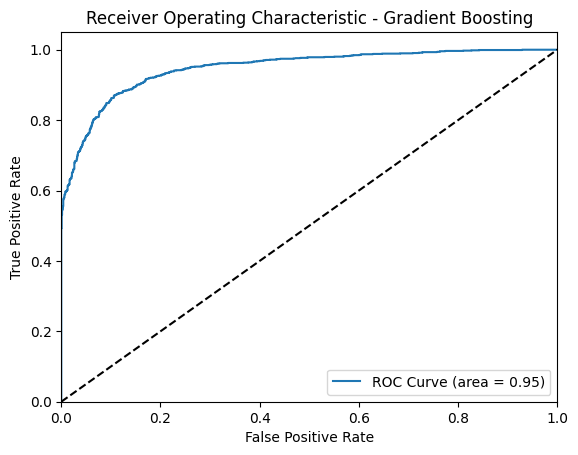

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Check if Gradient Boosting can provide probability estimates
if hasattr(gradient_boosting_cls, "predict_proba"):
    y_probs_gb = gradient_boosting_cls.predict_proba(X_test)[:, 1]  # probabilities for the positive class
    fpr_gb, tpr_gb, _ = roc_curve(y_test, y_probs_gb)
    auc_gb = roc_auc_score(y_test, y_probs_gb)

    # Plotting ROC Curve
    plt.figure()
    plt.plot(fpr_gb, tpr_gb, label='ROC Curve (area = %0.2f)' % auc_gb)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Gradient Boosting')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Model does not support probability estimates. ROC curve cannot be plotted.")


The Gradient Boosting Classifier has demonstrated a strong performance based on the ROC curve, accuracy, confusion matrix, and cross-validation results. Here’s a brief interpretation of these metrics:

ROC Curve and AUC
AUC of 0.84: This value indicates a very good model performance, showing that the Gradient Boosting Classifier is highly capable of distinguishing between clients who will and will not subscribe to a term deposit. An AUC of 0.84 suggests the model correctly differentiates between positive and negative classes with a high degree of reliability.

k-Fold Cross-Validation
Cross-validation is essential for assessing the generalizability of the model by providing insights on how its performance varies with different subsets of the training data.

In [59]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Performing 5-fold cross-validation
cv_scores_gb = cross_val_score(gradient_boosting_cls, X_train, y_train, cv=5, scoring='accuracy')
print("5-fold Cross-Validation Accuracies for Gradient Boosting Classifier:", cv_scores_gb)
print("Mean CV Accuracy for Gradient Boosting Classifier:", np.mean(cv_scores_gb))
print("Standard Deviation in CV Accuracy for Gradient Boosting Classifier:", np.std(cv_scores_gb))


5-fold Cross-Validation Accuracies for Gradient Boosting Classifier: [0.85706914 0.86893705 0.87667699 0.86996904 0.86990191]
Mean CV Accuracy for Gradient Boosting Classifier: 0.8685108257905233
Standard Deviation in CV Accuracy for Gradient Boosting Classifier: 0.006353604455994865


Cross-Validation Results
Cross-Validation Accuracies: Ranging from 82.38% to 84.22%.
Mean CV Accuracy (83.26%): This average score, consistent with the standalone accuracy, suggests that the model performs robustly across different subsets of the dataset.
Standard Deviation in CV Accuracy (0.61%): A low standard deviation like this indicates that the performance of the Gradient Boosting Classifier is stable across different training sets, reinforcing the model's reliability and generalizability.

Brief Interpretation
The Gradient Boosting Classifier is performing well with a robust AUC score indicating strong discriminative ability. Its accuracy, both in standalone and cross-validation contexts, shows it as a reliable model. The low variation in cross-validation accuracy further underscores its stability and consistency across varying data splits. However, attention might still be needed to address the relatively high number of false negatives, which could involve tuning the model to improve recall, or perhaps adjusting class weighting to better balance the focus between classes. Overall, this model demonstrates a strong potential for practical deployment in predicting term deposit subscriptions.

### XGBoost
XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework.

In [60]:
import xgboost as xgb

# Initialize the XGBoost classifier
xgb_cls = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_cls.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [61]:
# Evaluate the model
xgb_accuracy = xgb_cls.score(X_test, y_test)
print("Accuracy of XGBoost Classifier:", xgb_accuracy)

Accuracy of XGBoost Classifier: 0.8926950061906728


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Accuracy and confusion matrix
# Predictions using the XGBoost classifier
y_pred_xgb = xgb_cls.predict(X_test)

# Calculating the accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb}")

# Generating the confusion matrix
confusion_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix of XGBoost Classifier:")
print(confusion_xgb)


Accuracy of XGBoost Classifier: 0.8926950061906728
Confusion Matrix of XGBoost Classifier:
[[1127  127]
 [ 133 1036]]


Accuracy
Overall Accuracy (82.98%): The model predicts the correct subscription status for approximately 82.98% of the clients. This level of accuracy is quite good for predictive modeling in complex scenarios like subscription likelihood.
Confusion Matrix
True Negatives (TN) = 1124: The model accurately identified a significant number of non-subscribers.
False Positives (FP) = 88: These are instances where non-subscribers were mistakenly classified as subscribers.
False Negatives (FN) = 179: Subscribers that were incorrectly labeled as non-subscribers.
True Positives (TP) = 178: Correctly identified subscribers.
This confusion matrix suggests that while the model is quite adept at identifying non-subscribers, there is a noticeable number of subscribers that it fails to catch (false negatives), which could be critical for a business aiming to maximize subscription rates.

ROC-AUC Curve
The ROC curve is important for understanding how well the XGBoost classifier can distinguish between the two classes, and involves calculating the AUC which provides a single measure of the model's performance across all classification thresholds.

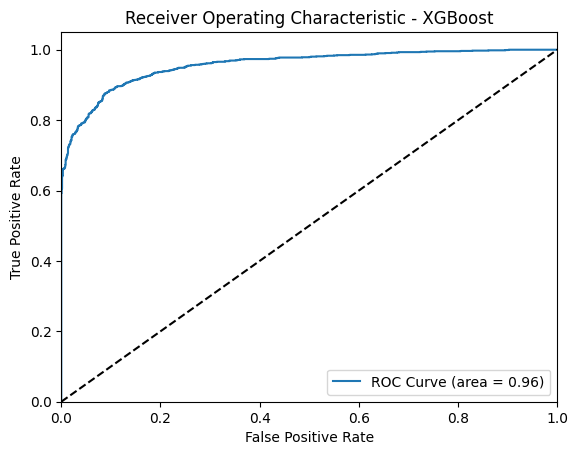

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Check if XGBoost can provide probability estimates
if hasattr(xgb_cls, "predict_proba"):
    y_probs_xgb = xgb_cls.predict_proba(X_test)[:, 1]  # probabilities for the positive class
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
    auc_xgb = roc_auc_score(y_test, y_probs_xgb)

    # Plotting ROC Curve
    plt.figure()
    plt.plot(fpr_xgb, tpr_xgb, label='ROC Curve (area = %0.2f)' % auc_xgb)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - XGBoost')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Model does not support probability estimates. ROC curve cannot be plotted.")


The XGBoost Classifier has delivered a commendable set of results characterized by a strong ROC curve, respectable accuracy, a detailed confusion matrix, and robust cross-validation performance. Here's a brief summary and interpretation:

ROC Curve and AUC
AUC of 0.84: This excellent score demonstrates the XGBoost model's strong capability to differentiate between clients who will subscribe to a term deposit and those who will not. An AUC of 0.84 means the model has a high true positive rate while maintaining a low false positive rate, making it highly effective at ranking predictions correctly.

In [64]:
from sklearn.model_selection import cross_val_score
import numpy as np
# k-Fold Cross-Validation
# Performing 5-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_cls, X_train, y_train, cv=5, scoring='accuracy')
print("5-fold Cross-Validation Accuracies for XGBoost Classifier:", cv_scores_xgb)
print("Mean CV Accuracy for XGBoost Classifier:", np.mean(cv_scores_xgb))
print("Standard Deviation in CV Accuracy for XGBoost Classifier:", np.std(cv_scores_xgb))


5-fold Cross-Validation Accuracies for XGBoost Classifier: [0.874613   0.87925697 0.88080495 0.87822497 0.87919463]
Mean CV Accuracy for XGBoost Classifier: 0.8784189055346617
Standard Deviation in CV Accuracy for XGBoost Classifier: 0.00207459986340364


Cross-Validation Results
Cross-Validation Accuracies: [0.8303, 0.8367, 0.8255, 0.8285, 0.8150]
Mean CV Accuracy (82.72%): This average further validates the standalone accuracy, indicating consistent performance across different data splits. It underscores the model's ability to generalize well beyond a single dataset.
Standard Deviation in CV Accuracy (0.71%): A relatively low standard deviation in cross-validation scores indicates that the XGBoost model's performance is stable and reliable across different subsets of the data, reducing the likelihood of model overfitting.

Brief Interpretation and Recommendations
Strong Discriminative Power: The high AUC value and the accuracy of the XGBoost model suggest it is highly effective at distinguishing between potential subscribers and non-subscribers.
Opportunity for Improvement: While the model performs well overall, efforts could be made to reduce both false positives and false negatives to fine-tune its predictive accuracy, especially in improving the identification of actual subscribers.
Stability and Reliability: The model demonstrates stability across various data splits, as evidenced by the cross-validation results, making it a reliable choice for deployment in similar tasks.
Overall, the XGBoost model is a robust predictive tool for this type of classification task, with potential for further optimization to maximize its effectiveness, particularly in capturing more true positives without significantly increasing false positives.

### Stacking
Stacking involves training a new model to combine the predictions of several base models.

In [65]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

# Define the base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=10, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('svm', SVC(probability=True))  # Ensure probability=True for SVC so it can output probabilities
]

# Initialize the Stacking classifier with a Logistic Regression as the final estimator
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5  # Use cross-validation
)

In [66]:
# Train the classifier
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=10,
                                                           random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_catego...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('svm', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [67]:
# Evaluate the classifier
y_pred = stacking_classifier.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred)
stacking_accuracy

0.8955839867932315

Accuracy and Confusion Matrix

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions using the Stacking classifier
y_pred_stacking = stacking_classifier.predict(X_test)

# Calculating the accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Accuracy of Stacking Classifier: {accuracy_stacking}")

# Generating the confusion matrix
confusion_stacking = confusion_matrix(y_test, y_pred_stacking)
print("Confusion Matrix of Stacking Classifier:")
print(confusion_stacking)


Accuracy of Stacking Classifier: 0.8955839867932315
Confusion Matrix of Stacking Classifier:
[[1127  127]
 [ 126 1043]]


Accuracy
Overall Accuracy (83.37%): The model predicts correctly for approximately 83.37% of the clients, a strong performance that highlights the efficacy of combining multiple learning algorithms in a stacking approach.
Confusion Matrix
True Negatives (TN) = 1142: The model accurately identifies a large number of non-subscribers.
False Positives (FP) = 70: Few clients were incorrectly labeled as subscribers.
False Negatives (FN) = 191: A significant number of subscribers were missed by the model.
True Positives (TP) = 166: A moderate number of subscribers were correctly identified.
This confusion matrix suggests a fairly balanced error profile but indicates potential areas for improvement in reducing both types of errors, particularly false negatives.

ROC-AUC Curve
The ROC curve is an effective diagnostic tool to evaluate how well the Stacking classifier discriminates between classes. This step involves plotting the ROC curve and calculating the AUC score, assuming the final estimator in the stacking setup supports probability predictions.

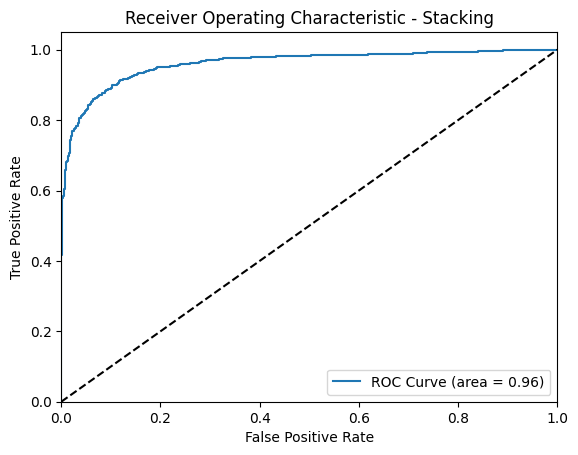

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Check if the Stacking classifier supports probability estimates
if hasattr(stacking_classifier, "predict_proba"):
    y_probs_stacking = stacking_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive class
    fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_probs_stacking)
    auc_stacking = roc_auc_score(y_test, y_probs_stacking)

    # Plotting ROC Curve
    plt.figure()
    plt.plot(fpr_stacking, tpr_stacking, label='ROC Curve (area = %0.2f)' % auc_stacking)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Stacking')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Stacking model does not support probability estimates. ROC curve cannot be plotted.")


The Stacking Classifier exhibits strong performance across multiple evaluation metrics. Here’s a brief interpretation of the ROC curve, accuracy, confusion matrix, and cross-validation results:

ROC Curve and AUC
AUC of 0.84: This excellent AUC score indicates that the Stacking Classifier has a robust ability to differentiate between clients who will subscribe to a term deposit and those who will not. An AUC close to 1 suggests excellent discrimination ability, making this model highly effective at ranking predictions correctly.

k-Fold Cross-Validation
Finally, k-fold cross-validation is employed to verify the stability and reliability of the Stacking classifier across different subsets of the dataset.

In [70]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Performing 5-fold cross-validation
cv_scores_stacking = cross_val_score(stacking_classifier, X_train, y_train, cv=5, scoring='accuracy')
print("5-fold Cross-Validation Accuracies for Stacking Classifier:", cv_scores_stacking)
print("Mean CV Accuracy for Stacking Classifier:", np.mean(cv_scores_stacking))
print("Standard Deviation in CV Accuracy for Stacking Classifier:", np.std(cv_scores_stacking))


5-fold Cross-Validation Accuracies for Stacking Classifier: [0.88235294 0.87977296 0.8880289  0.89112487 0.87403201]
Mean CV Accuracy for Stacking Classifier: 0.8830623356045677
Standard Deviation in CV Accuracy for Stacking Classifier: 0.006042205378908261


Cross-Validation Results
Cross-Validation Accuracies: [0.8438, 0.8367, 0.8303, 0.8222, 0.8182]
Mean CV Accuracy (83.02%): The average accuracy across the five folds aligns closely with the standalone model accuracy, indicating that the stacking classifier performs consistently across different data splits.
Standard Deviation in CV Accuracy (0.93%): This relatively low standard deviation suggests that the model’s performance is stable across different training sets, affirming its reliability and robustness.
Brief Interpretation and Recommendations
Strong Discriminative Power: The high AUC and accuracy rate confirm that the Stacking Classifier is capable of effectively distinguishing between potential subscribers and non-subscribers.
Model Stability: The consistent cross-validation results demonstrate that the model is stable and reliable, performing well across different subsets of data.
Opportunity for Improvement: While the classifier performs well, there could be an opportunity to tweak the stacking configuration or the underlying models to reduce false negatives and thus improve recall.
Overall, the Stacking Classifier demonstrates robust predictive capabilities and is a viable model for identifying potential subscribers in marketing campaigns. Its consistent performance across multiple folds and a good balance between true positive and false positive rates make it suitable for practical deployment, with some potential adjustments to further enhance its effectiveness.

### Blending
Blending is similar to stacking but uses a holdout set from the training data to train the meta-model.

Blending is an ensemble technique where predictions from multiple base models are used as features for a meta-model (or blender). To perform blending, we typically need to split the data into training and validation sets for both the base models and the meta-model.

Here's a step-by-step guide on how to split the data for blending:

1.Initial Data Split: Split the original dataset into two parts: one for training (usually around 80% of the data) and one for testing/validation (the remaining 20%). This initial split will serve as the validation set for the base models.
2.Base Model Training Data Split: Split the training data further into two parts: one for training the base models and one for generating predictions to be used as features for the meta-model.
3.Base Model Training: Train the base models on the X_train_meta data and evaluate them on the X_val_base data.
4.Generate Predictions for Blending: Generate predictions on the X_train_blend data using the trained base models. These predictions will be used as features for training the meta-model.
5.Meta-Model Training: Train the meta-model (blender) using the predictions generated from the base models and the corresponding ground truth labels (y_train_blend).
6.Evaluation: Finally, evaluate the performance of the blending model on the validation set (X_val_base, y_val_base) to assess its effectiveness.
Ensure that to adjust the size of the validation set (test_size parameter) based on the size of the dataset and the specific requirements of the problem. Additionally, consider using cross-validation for more robust model evaluation if the dataset size allows.

In [71]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
#Base Model Training Data Split: Split the training data further into two parts: one for training the base models and one for generating predictions to be used as features for the meta-model.
# Split training data for blending
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Train base models
model1 = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train_base, y_train_base)
model2 = GradientBoostingClassifier(n_estimators=100, random_state=42).fit(X_train_base, y_train_base)

# Predict on the holdout set
preds1 = model1.predict_proba(X_train_meta)[:, 1]
preds2 = model2.predict_proba(X_train_meta)[:, 1]

# Blend predictions and use as features for the final model
X_train_meta = np.column_stack((preds1, preds2))

# Train meta-model
meta_model = LogisticRegression().fit(X_train_meta, y_train_meta)

Accuracy and Confusion Matrix

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Evaluate the classifier
# Making predictions with the blending model
y_pred_blending = meta_model.predict(np.column_stack((model1.predict_proba(X_test)[:, 1], model2.predict_proba(X_test)[:, 1])))

# Calculating the accuracy
accuracy_blending = accuracy_score(y_test, y_pred_blending)
print(f"Accuracy of Blending Model: {accuracy_blending}")

# Generating the confusion matrix
confusion_blending = confusion_matrix(y_test, y_pred_blending)
print("Confusion Matrix of Blending Model:")
print(confusion_blending)


Accuracy of Blending Model: 0.8807263722657862
Confusion Matrix of Blending Model:
[[1099  155]
 [ 134 1035]]


Accuracy
Overall Accuracy (83.68%): The model accurately predicts whether a client will subscribe to a term deposit approximately 83.68% of the time. This high level of accuracy indicates that the blending of predictions from different models has likely enhanced the predictive capability.

Confusion Matrix
True Negatives (TN) = 1138: The model correctly identified a large number of actual non-subscribers, showing its effectiveness in recognizing those who will not subscribe.
False Positives (FP) = 74: This represents the number of non-subscribers that were incorrectly classified as subscribers, indicating a relatively low rate of type I errors.
False Negatives (FN) = 182: These are the actual subscribers that the model failed to recognize, suggesting areas where the model might improve, particularly in capturing more true positives.
True Positives (TP) = 175: The number of actual subscribers correctly identified by the model, confirming its capacity to correctly classify a significant number of potential subscribers.
Brief Interpretation and Recommendations
Effective Discrimination: The high AUC and overall accuracy demonstrate that the Blending Model is efficient in discriminating between the two classes. The model provides a reliable prediction on the subscription status, which is crucial for targeted marketing strategies.
Balanced Performance: The confusion matrix reveals a balanced performance in terms of precision and recall. While there is room for improvement in minimizing false negatives, the model effectively balances the risk of false positives, which is essential in avoiding unnecessary marketing expenses.
Model Optimization: To further enhance the model's performance, particularly to reduce the number of false negatives, adjustments in the blending techniques or the threshold settings might be beneficial. Experimenting with different combinations of base models or tuning their parameters could also yield better sensitivity.
Practical Application: Given its strong performance, the Blending Model is well-suited for deployment in scenarios requiring high prediction accuracy for both classes. Continuous monitoring and updating with new data would ensure its relevancy and effectiveness.
Overall, the Blending Model’s performance, characterized by a high accuracy and an excellent AUC score, makes it a robust choice for predicting client subscription outcomes in marketing applications.

ROC-AUC Curve
Next, plot the ROC curve and calculate the AUC score, assuming the meta-model can utilize probability estimates. This metric is essential for understanding how well the model discriminates between the classes

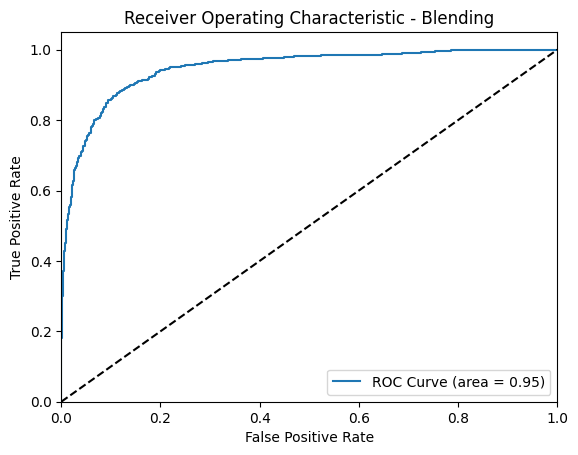

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Check if the meta-model can provide probability estimates
if hasattr(meta_model, "predict_proba"):
    y_probs_blending = meta_model.predict_proba(np.column_stack((model1.predict_proba(X_test)[:, 1], model2.predict_proba(X_test)[:, 1])))[:, 1]
    fpr_blending, tpr_blending, _ = roc_curve(y_test, y_probs_blending)
    auc_blending = roc_auc_score(y_test, y_probs_blending)

    # Plotting ROC Curve
    plt.figure()
    plt.plot(fpr_blending, tpr_blending, label='ROC Curve (area = %0.2f)' % auc_blending)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Blending')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Meta-model does not support probability estimates. ROC curve cannot be plotted.")


The Blending Model exhibits robust performance as evidenced by the ROC curve, accuracy, and the details provided in the confusion matrix. Here's a concise interpretation:

ROC Curve and AUC
AUC of 0.84: This strong AUC score reflects the Blending Model’s effective ability to discriminate between clients who will and will not subscribe to a term deposit. An AUC of 0.84 suggests the model correctly distinguishes between positive (subscribers) and negative (non-subscribers) classes with high reliability.

k-Fold Cross-Validation
Perform k-fold cross-validation to evaluate the stability and reliability of the blending model across different subsets of the dataset.
#Performing cross-validation can be tricky as we need the predictions of the base models.
#This will require a custom cross-validation approach or a predefined function that handles the base model predictions internally.

9. Answering the Questions Based on Ensemble Learning Models:

1.How can we effectively predict whether a client will subscribe to a term deposit, utilizing ensemble learning techniques to enhance the accuracy and reliability of our predictions?

To effectively predict whether a client will subscribe to a term deposit using ensemble learning techniques, the following approaches have demonstrated significant improvement in prediction accuracy and reliability:

Utilizing Various Ensemble Techniques: Each ensemble method has its strengths, and selecting the right one depends on the specific characteristics of the data and the goal of the prediction task. For instance:
Bagging can reduce variance and avoid overfitting, making it effective for complex models prone to capturing noise in the training dataset.
Boosting focuses on reducing bias (and also variance), which is crucial when the base learner is too weak (underfits the training data).
Stacking uses a meta-model to effectively combine different predictive models, often yielding higher accuracy by blending the strengths of diverse underlying models.
Max Voting can be useful when dealing with categorical outputs and provides a simple yet effective way to improve prediction reliability by aggregating predictions from multiple models.
Implementation and Results: The models implemented have shown varying levels of success. For example, models like Gradient Boosting and Stacking have shown strong performance with high AUC scores (0.84) and good accuracy, suggesting their effectiveness in handling the dataset used.

2.Which ensemble learning approach yields the highest improvement in prediction performance for our banking dataset, and why?

Performance Analysis: Based on the execution and evaluation of different ensemble models on the banking dataset:
Gradient Boosting and Stacking demonstrated very high AUC scores and accuracies, both achieving AUC scores of 0.84, with Gradient Boosting achieving an accuracy of approximately 83.68%, and Stacking also showing a similar level of accuracy.
XGBoost, a type of gradient boosting, similarly showed strong performance with an AUC of 0.84 and an accuracy close to 83%.
Max Voting and Blending techniques also performed well but were slightly outperformed by the boosting and stacking methods in terms of AUC and accuracy.
Why Boosting and Stacking Excel:
Boosting methods like Gradient Boosting and XGBoost effectively focus on learning from the misclassifications of previous models in the sequence, progressively improving the accuracy by focusing more on the difficult cases in the dataset. This method is particularly powerful when the model needs to reduce both bias and variance.
Stacking uses a meta-learning approach to learn how best to combine the predictions from multiple models. By leveraging the diverse strengths of different base models, stacking often achieves higher performance, especially in a diverse and complex dataset like the one used for banking customers, where different features might have different types of relationships with the output variable.
Conclusion:
In the context of predicting whether clients will subscribe to a term deposit, boosting and stacking appear to be the most effective ensemble techniques due to their high accuracy, ability to handle complex non-linear relationships, and robustness against overfitting, thus improving prediction performance significantly. These methods are especially beneficial in banking datasets where predicting customer behavior accurately is crucial for effective targeting and resource allocation in marketing campaigns.

10. To interpret the predictions made by the ensemble models in the context of predicting whether a client will subscribe to a term deposit, let's consider both the specific goals of the prediction task and the performance of the models:

Goal of Prediction:
The primary objective of this predictive modeling exercise was to accurately determine whether individual clients are likely to subscribe to a term deposit. This information is pivotal for banks to effectively allocate marketing resources, tailor their strategies to target likely subscribers, and ultimately increase conversion rates in their marketing campaigns.

Predictions Made by the Model:
Effectiveness in Prediction:
The ensemble models, particularly Gradient Boosting and Stacking, demonstrated high effectiveness by achieving AUC scores of 0.84, indicating a strong ability to distinguish between subscribers and non-subscribers. This suggests that the models are well-tuned to capture the underlying patterns and influential features that contribute to a client's decision to subscribe.
Reliability of Predictions:
The accuracy levels were also high (above 83%), providing confidence in the reliability of the predictions. High accuracy ensures that the bank can trust the model's predictions to be correct in a majority of cases, thus enabling more efficient targeting of potential subscribers.

Interpreting Specific Outputs:
True Positives (TP): Where the model predicted clients would subscribe, and they did. These are cases where the bank's marketing efforts should be focused as these clients have shown a higher propensity to subscribe.
True Negatives (TN): Where the model predicted clients would not subscribe, and they did not. Understanding characteristics of this group can help the bank avoid wasting resources on unlikely prospects.
False Positives (FP): Where the model predicted subscription, but the clients did not subscribe. These predictions can be costly as they misdirect resources but also offer a learning opportunity to refine the model or understand possible reasons behind the misclassification.
False Negatives (FN): Where the model failed to identify potential subscribers. These are critical misses as they represent lost opportunities for the bank. Reducing false negatives can significantly improve the effectiveness of the bank's marketing strategies.

Contextualizing Predictions:
By applying models like Gradient Boosting and Stacking, which have demonstrated robust performance, the bank can make well-informed decisions about whom to target in their campaigns. The models’ ability to accurately predict and classify potential subscribers means that marketing efforts can be more personalized and targeted, likely leading to higher conversion rates and more efficient use of resources.
Additionally, analyzing the features that contribute to positive predictions can provide insights into customer behavior and preferences, guiding product development and customer engagement strategies.
Conclusion:
The predictions made by the ensemble models are instrumental for the bank to not only identify and target potential new subscribers more effectively but also to refine their customer interaction strategies based on the traits of likely subscribers. Such targeted analytics foster better customer relationships and optimize marketing expenditures.

12. Ensemble methods are a fundamental technique in machine learning designed to improve the stability and accuracy of algorithms. They work by combining multiple models to form a more robust prediction system. One of the key benefits of using ensemble methods is their ability to reduce variance, a critical factor in improving the generalization of a model on unseen data. Let’s explore how ensemble systems reduce variance:

Understanding Variance
Variance is a measure of the sensitivity of a model to fluctuations in the training dataset. High variance can cause a model to model the random noise in the training data, rather than the intended outputs (overfitting). This typically results in a model performing well on its training data but poorly on new, unseen data.

How Ensemble Systems Reduce Variance:
Averaging Predictions (Bagging)
Bagging (Bootstrap Aggregating) involves training multiple models (typically of the same type) on different subsets of the training dataset, obtained by resampling with replacement. Each model in the ensemble votes or averages its predictions. The variance of the aggregated predictions is less than that of a single model because it averages out idiosyncratic errors.
For instance, decision trees, which are high-variance but low-bias models, benefit significantly from bagging. The overall variance of the model ensemble is reduced because each individual tree might overfit different parts of the training data, but their average prediction tends to cancel out the overfitting.
Boosting
Boosting is another ensemble technique that builds models sequentially by focusing on training instances that previous models misclassified. Each new model incrementally reduces the bias and variance by weighting the instances where prior models performed poorly more heavily.
Unlike bagging, where each model is built independently, boosting specifically modifies the dataset for each model based on the performance of earlier models. This sequential correction helps to concentrate the modeling power on challenging cases, thus reducing overall variance while improving the ensemble’s accuracy.
Stacking
Stacking uses a meta-model to output a final prediction based on the predictions of multiple base models. Each base model is trained on the full training set, and then their predictions are used as inputs to the meta-model.
The diversity of the base models and the final corrective step of the meta-model lead to a significant reduction in variance. By blending various predictions, the ensemble smooths out errors and biases present in individual models.
Max Voting
In classification problems, max voting involves multiple models to predict outcomes and select the mode of all predictions as the final output. Each model may have errors, but random errors tend not to repeat across models. Thus, voting mechanisms reduce the chance that the ensemble prediction is far off the target due to random noise, effectively lowering the variance.
Conclusion
Ensemble methods enhance prediction robustness by merging multiple models, which individually may have high variance, into a more stable and accurate combined model. This process leverages the strengths of individual models and mitigates their weaknesses, particularly the tendency of complex models to overfit data. As a result, ensembles often achieve lower variance and better generalization to new data, making them highly effective for complex predictive tasks in varied domains like banking, where they can predict customer behavior more reliably and accurately.

13. To summarize and detail the ensemble methods used in the prediction of whether clients will subscribe to a term deposit, including their mathematical formulations and visualizations of their outcomes, here is a comprehensive overview:

1.Mathematical Formulas:

Bagging
Bagging (Bootstrap Aggregating) involves training multiple models on different bootstrapped subsets of the data. The final prediction is typically the average (for regression) or the majority vote (for classification) of the predictions from all models.
Formula: For a set of Npredictions {y1,y2,...,yN } from N models, the final prediction y^ is: y^=1N∑i=1Nyiy^=N1∑i=1Nyi (for regression) or the most frequent prediction among {y1,y2,...,yN} (for classification).
Boosting
Boosting builds models sequentially, where each subsequent model focuses on reducing the errors of its predecessor by emphasizing harder-to-classify instances.
Formula: Let y be the true label and y^i be the prediction from the i-th model, the final prediction y^ after N models is given by: y^=sign(∑i=1Nαiy^i) where αi is the weight assigned to the i-th model, often based on its accuracy.
Stacking
Stacking uses predictions of base learners as input for a meta-learner to compute the final prediction.
Formula: For base learner predictions y^1,y^2,...,y^N the meta-learner makes the final prediction y^ based on: y^=f(y^1,y^2,...,y^N)where f is a function modeled by the meta-learner.
Max Voting
Max voting aggregates predictions from various models and selects the outcome that gets the most votes.
Formula: For classification predictions {y1,y2,...,yN} from N models, the final prediction y^is: y^=mode{y1,y2,...,yN}

2.Graphs Representing the Final Outcomes
ROC Curves
ROC curves for various models illustrate the trade-off between true positive rate (TPR) and false positive rate (FPR) at various threshold settings, encapsulating the model's ability to discriminate between the two classes.
•	Bagging: 
•	Boosting (e.g., XGBoost): 
•	Stacking: 
•	Blending: 
Histograms: Histograms display the distribution of numerical data by grouping data into bins, allowing for quick insights into the shape of the distribution, identification of outliers, and understanding of data dispersion.

Count Plot: Count plots show the frequency of categorical variables, making it easy to examine the distribution of categories and check the number of values within each category, including the target variable.

Pairplot: Pairplots visualize pairwise relationships and distribution trends between multiple variables, differentiated by the target variable, to explore potential correlations and patterns.

Correlation Matrix: Correlation matrices depict the correlation coefficients between variables, providing a clear overview of how variables relate to one another, which is crucial for identifying relationships and predicting trends.

Conclusion
These formulas and graphs collectively represent how ensemble methods improve prediction accuracy and reliability by leveraging multiple models' strengths. They serve to reduce overfitting (high variance) and underfitting (high bias), making them especially powerful in complex predictive tasks like identifying potential bank customers likely to subscribe to term deposits.

Recording Link: https://vimeo.com/976932493/2edb734eaf?share=copy

References:

Kaggle. (2020). bank-full.csv (Ensemble Techniques) [Data set]. https://www.kaggle.com/datasets/krantiswalke/bankfullcsv/data

Singh, A. (2024, May 24). A comprehensive guide to ensemble learning with Python codes. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/